# **Maternal Health Risk Prediction**

# **Group no. 14**

# Ashish Sunny Abraham , Divija Padma Kanumury, Kundana Lakshmi Yekollu, Nigama Annapurna Dendukuri, Rhea Mary Ann Papali
<!--
# **Summary (about 500-700 words)** -->
--------------
<!-- Here you need to provide a summary of the work done. You kind of summarize everything as suggested below. -->


**Project description**
<!-- This section introduces your project. For that, it must
contain one paragraph (not exactly but this can be used as
a suggestion) for each of the following parts:

1. Contextualization: Present the context in which you
approached the problem you are trying to solve

2. Problem: Present the problem your project attempts to solve

3. Proposed approach: summarize the work you have done to solve the problem.

4. Impact: The consequences and benefits of your approach. -->

<u>Context</u>: Our project addresses the challenge of precise maternal risk prediction using data from Internet of Medical Things (IoMT) devices in the field of maternal health. The integration of these devices into healthcare settings has generated significant data, prompting the need to identify an optimal subset of IoMT devices for accurate risk prediction. This initiative aligns with the larger goal of improving healthcare technology for enhanced maternal health monitoring.

<u>Problem</u>: Maternal health is critical, necessitating early risk identification. To streamline risk prediction, the project tackles the challenge of selecting relevant sensors from the MaternalHealthRisk_project1.csv dataset, sourced from IoMT devices. The project intends to use feature selection to identify a concise set of devices that balance computational efficiency, cost-effectiveness, and simplified device design.

<u>Approach</u>: Our approach involves meticulously exploring the IoMT-derived dataset and using feature selection to identify critical devices for maternal risk prediction. Machine learning models for classification and prediction are then implemented, with subsequent evaluation revealing the impact of selected features on predictive accuracy. These findings contribute to improved maternal health monitoring and have implications for future IoMT device design.

<u>Impact</u>: In addition to accurate risk prediction, our approach has the potential to reduce costs and simplify design for future maternal health monitoring systems. The project optimizes healthcare resources while also contributing to the ethical handling of sensitive maternal health data by strategically selecting IoMT devices. The simplified approach influences the design of IoMT devices, improving the quality of care for expectant mothers.

**Objective:**
<!-- Articulate at some greater details the objective of your project in terms of the actual problem on hand and with reference to the given dataset. -->
The goal is to use the Maternal Health Risk dataset, sourced from Internet of Medical Things (IoMT) devices, to improve the accuracy of maternal risk prediction. The challenge is to choose a subset of IoMT devices that minimizes costs and simplifies device design while maintaining near-identical accuracy in predicting maternal risk levels. The project aims to identify the most relevant sensors using feature selection techniques and machine learning models, contributing to the optimization of maternal health monitoring and influencing the future design and manufacturing of IoMT devices.

**Dataset:**
<!-- Describe the dataset you are using in this project. You may include any information that helps understand the origin and history of the dataset and also the content of the dataset in terms of features. If you change any values in the dataset, you need to describe it. -->

<u>Dataset Name</u>: MaternalHealthRisk_project1.csv

<u>Source</u>: Collected from an IoMT environment.

<u>Contents</u>: Includes data from various IoMT devices/sensors and a target variable indicating maternal risk levels.

1. Age: The age of a pregnant lady expressed in years.

2. WeightKG: The weight of the women in KG.

3. SystolicBP: Upper blood pressure measured in millimeters.

4. DiastolicBP: Lower blood pressure reading in millimeters.

5. BS: Blood glucose levels are expressed in millimoles per liter, or mmol/L.

6. Heart Rate: The heart rate at rest, measured in beats per minute.

7. Blood_Oxygen_Level: Oxygen saturation level in the blood.

8. BodyTemp_F: Body Temperature in Fahrenheit Units.

9. BodyTemp_C: Body Temperature in Celsius Units.

10. Risk Level: Based on the preceding characteristic, the anticipated level of risk intensity during pregnancy.

**Approach:**
<!-- Here describe the approach you took in a little more details. But not in full details as you are only giving an introduction at this stage. -->
The project systematically explores the Maternal Health Risk dataset to address maternal risk prediction challenges. Understanding the dataset's structure is gained through exploratory data analysis. Feature selection techniques are applied to identify a concise set of IoMT devices crucial for accurate risk prediction. Machine learning models for classification and prediction are implemented, and the evaluation of model performance provides insights into the impact of feature selection on predictive accuracy. This approach balances computational efficiency, cost-effectiveness, and simplified design for effective maternal health monitoring, influencing the future design and manufacturing of IoMT devices.

**Conclusions:**
<!-- Here provide a summarative statement about your results and your observations. -->
Our project demonstrates that strategic feature selection in the Maternal Health Risk dataset from IoMT devices allows for the identification of a subset of crucial sensors. This optimized set shows comparable accuracy in predicting maternal risk levels, highlighting the potential for cost reduction and simplified device design. Our observations emphasize the importance of thoughtful IoMT device selection, not only for computational efficiency in maternal health monitoring but also for influencing the broader landscape of future IoMT device design and manufacturing, emphasizing the importance of balancing accuracy with practical considerations.

--------------


# I. Preparation

The first thing we do is connect to our google account and mount our landing Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Example basic libraries to import
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import plotly.express as px
from scipy.io import arff
import warnings
warnings.simplefilter("ignore")

# Example machine learning libraries to import
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.metrics import accuracy_score, mean_squared_error  # For model evaluation


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, fbeta_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn import tree
import xgboost as xgb

### **Loading the data**
To load our dataset, we first uploaded the dataset to our Google drive in a folder 'DH Dataset'.

Then, we load the dataset using read_csv() into a datadrame.

In [ ]:
df_org = pd.read_csv("/content/drive/MyDrive/DH Dataset/MaternalHealthRisk_project1.csv")
df_1 = df_org.copy()
df_org

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0         86   
1      35      86.4         140           90  13.0         70   
2      29      57.3          90           70   8.0         80   
3      30      81.0         140           85   7.0         70   
4      35      47.7         120           60   6.1         76   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0         80   
1010   55      50.8         120           90  18.0         60   
1011   35      81.2          85           60  19.0         86   
1012   43      58.1         120           90  18.0         70   
1013   32      53.5         120           65   6.0         76   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7  high risk  
1                     96        98.0        36.7  high risk  
2                     98       100.0        37.8  high risk  
3                     94        98.0        36.7  high risk  
4                     98        98.0        36.7   low risk  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7  high risk  
1010                  92        98.0        36.7  high risk  
1011                  91        98.0        36.7  high risk  
1012                  96        98.0        36.7  high risk  
1013                  94       101.0        38.3   mid risk  

[1014 rows x 10 columns]

### **Exploratory Data Analysis - Understand and connect with the Dataset**
Here we gain a deep understanding of the data we are working with. We explore the format, structure, shape and the type of information the data contains. We use pandas, matplotlib and numpy to interrogate and visualize the dataset to understand its shape, size, contents, distribution and any skewness of its contents,and to also get a feel for its cleanness, completeness, and any other issues.


In [ ]:
#Information about the columns of the Dataset
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1014 non-null   int64  
 1   WeightKG            1014 non-null   float64
 2   SystolicBP          1014 non-null   int64  
 3   DiastolicBP         1014 non-null   int64  
 4   BS                  1014 non-null   float64
 5   HeartRate           1014 non-null   int64  
 6   Blood_oxygen_level  1014 non-null   int64  
 7   BodyTemp_F          1014 non-null   float64
 8   BodyTemp_C          1014 non-null   float64
 9   RiskLevel           1014 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 79.3+ KB


**Check for Null/NaN values for each column**

In [ ]:
#Check for null/NAN values
df_org.isnull().sum()

Age                   0
WeightKG              0
SystolicBP            0
DiastolicBP           0
BS                    0
HeartRate             0
Blood_oxygen_level    0
BodyTemp_F            0
BodyTemp_C            0
RiskLevel             0
dtype: int64

**Check for missing values in each column**

In [ ]:
#check for missing values in columns
df_org.isna().sum()

Age                   0
WeightKG              0
SystolicBP            0
DiastolicBP           0
BS                    0
HeartRate             0
Blood_oxygen_level    0
BodyTemp_F            0
BodyTemp_C            0
RiskLevel             0
dtype: int64

**Check for duplicate data**

In [ ]:
#check for duplicate data
print(f"There are {df_org.duplicated().sum()} duplicates data")
df_org.loc[df_org.duplicated(keep=False)].sort_values(by=df_org.columns.to_list())

There are 1 duplicates data


Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
655   48      57.5         120           80  11.0         88   
979   48      57.5         120           80  11.0         88   

     Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
655                  92        98.0        36.7  high risk  
979                  92        98.0        36.7  high risk

Duplicate data consumes unneeded store space and, at best, slows calculations. At worst, duplicate data can skew analysis results and jeopardize the data set's integrity. Including them will result in the model overfitting this group of points. However, in this case, as we dont have many duplicate values we will attempt to examine the data first in order to understand its distribution.

In [ ]:
#Count of values for each risk level
risk_levels = df_org["RiskLevel"].value_counts()
risk_levels_df = pd.DataFrame(risk_levels)
risk_levels_df = risk_levels.reset_index(level = 0)
risk_levels_df

index  RiskLevel
0   low risk        406
1   mid risk        336
2  high risk        272

In [ ]:
df_org.size

10140

**Distribution of Risk levels**

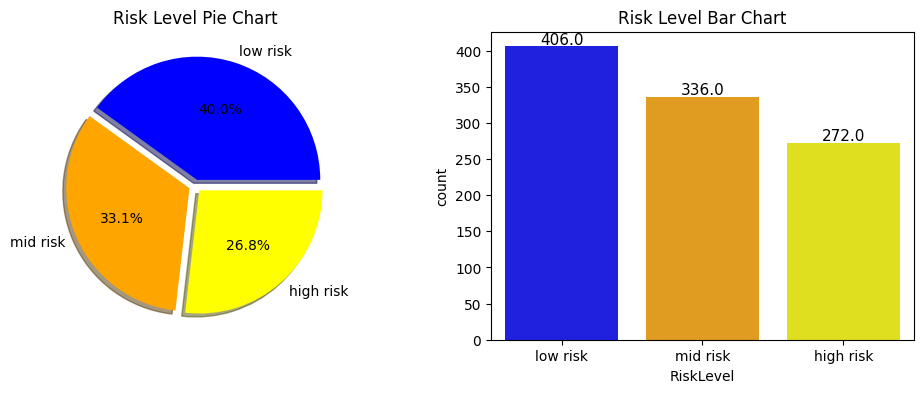

In [ ]:
# Plotting risk level counts and percentages
p_colors = ['blue', 'orange', 'yellow']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_org["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df_org, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 5),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

The risk levels have an unbalanced distribution.

In [ ]:
df_org.describe().T

count        mean        std   min      25%     50%  \
Age                 1014.0   29.871795  13.474386  10.0   19.000   26.00   
WeightKG            1014.0   67.672091  12.976207  45.5   56.025   67.35   
SystolicBP          1014.0  113.198225  18.403913  70.0  100.000  120.00   
DiastolicBP         1014.0   76.460552  13.885796  49.0   65.000   80.00   
BS                  1014.0    8.725986   3.293532   6.0    6.900    7.50   
HeartRate           1014.0   74.301775   8.088702   7.0   70.000   76.00   
Blood_oxygen_level  1014.0   94.637081   2.948797  90.0   92.000   95.00   
BodyTemp_F          1014.0   98.665089   1.371384  98.0   98.000   98.00   
BodyTemp_C          1014.0   37.059763   0.743991  36.7   36.700   36.70   

                        75%    max  
Age                  39.000   70.0  
WeightKG             79.375   90.3  
SystolicBP          120.000  160.0  
DiastolicBP          90.000  100.0  
BS                    8.000   19.0  
HeartRate            80.000   90.0  
Blood_oxygen_level   97.000   99.0  
BodyTemp_F           98.000  103.0  
BodyTemp_C           36.700   39.4

**Univariate Analysis**

Univariate analysis involves analysing each variable separately in a dataset to determine its distribution, which includes its central tendency and the range of values it spans.



In [ ]:
def num_plot(data, col):
  """
  Generate a histogram with KDE and a boxplot for a numerical column in a given dataset.

  Parameters:
    data (DataFrame): The input DataFrame containing the data.
    col (str): The column name for which the plots are generated.
  """
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  sns.histplot(data=data, x=col, kde=True, ax=ax[0], color="#FFA500")
  sns.boxplot(data=data, x=col, ax=ax[1])
  ax[0].set_title(f"{col} Distribution Histogram")
  ax[1].set_title(f"{col} Distribution Boxplot")

  plt.show()



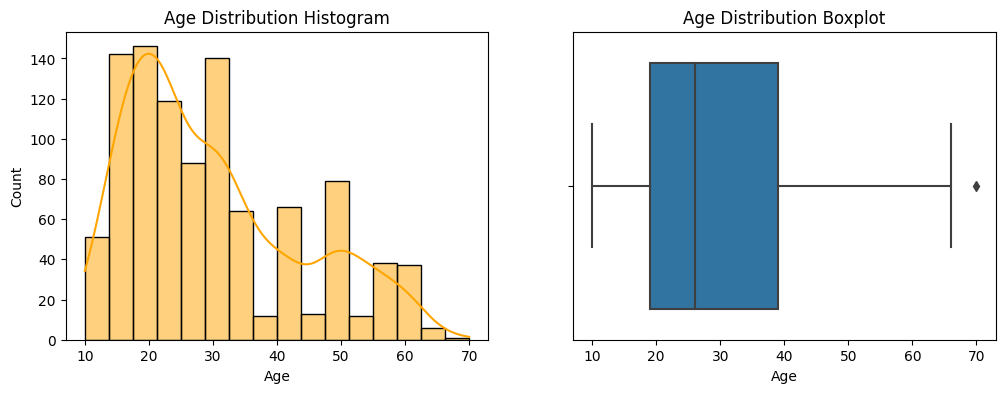

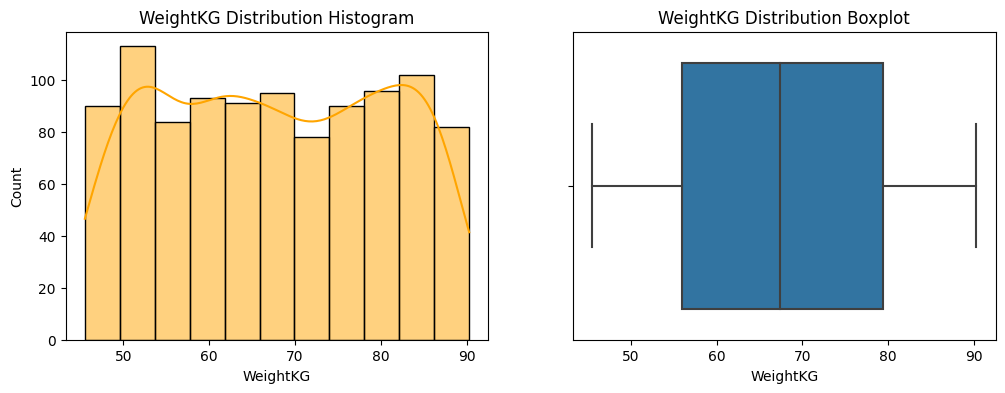

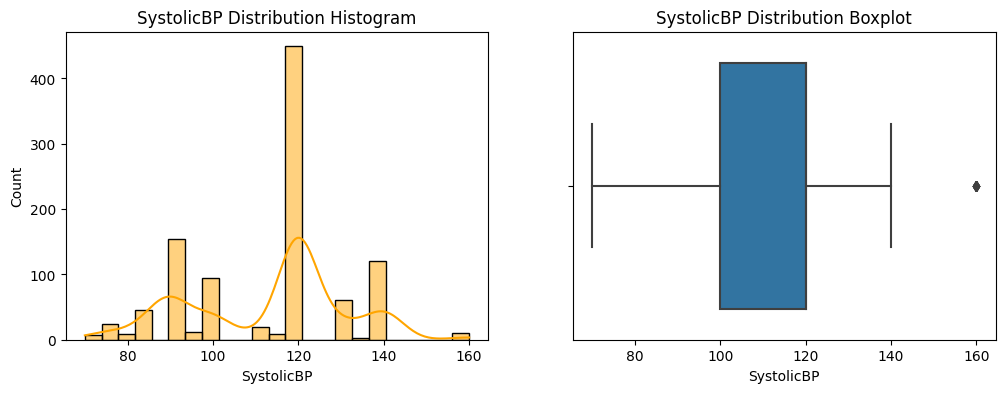

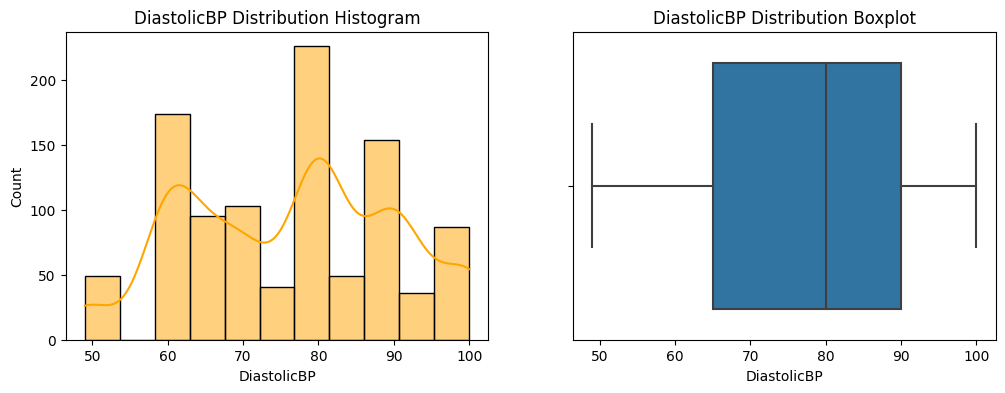

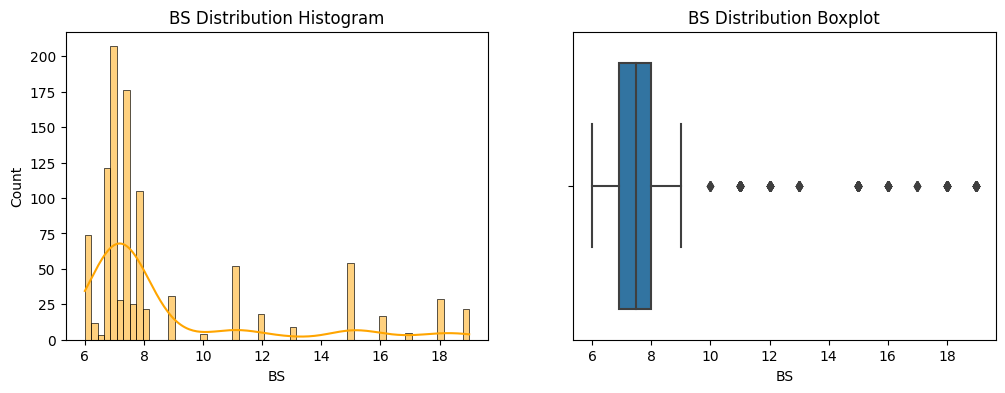

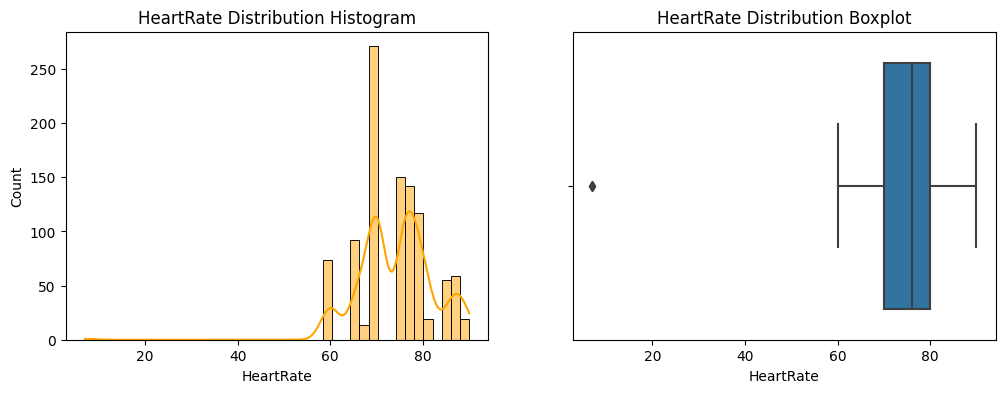

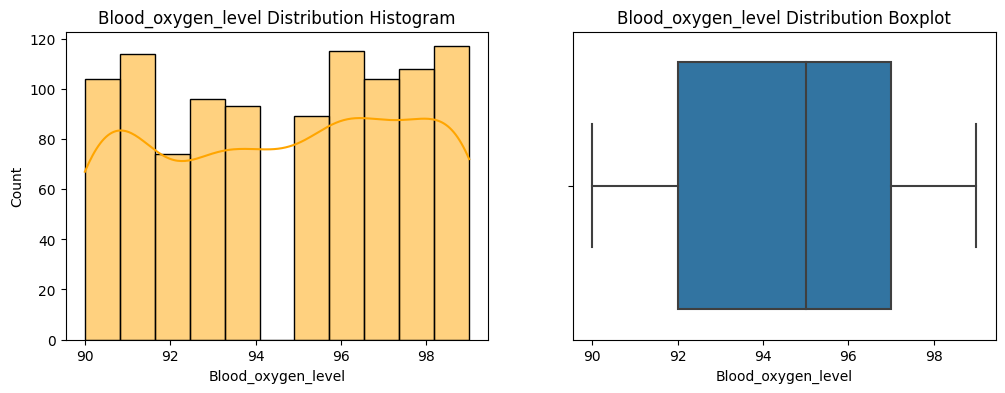

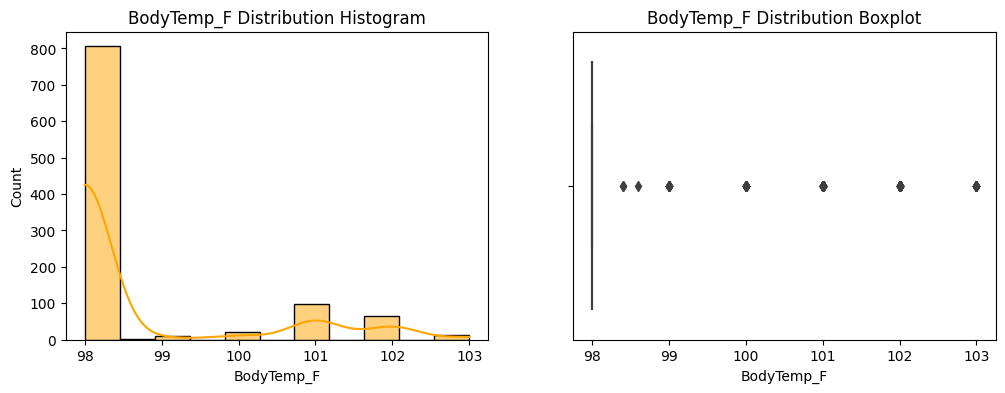

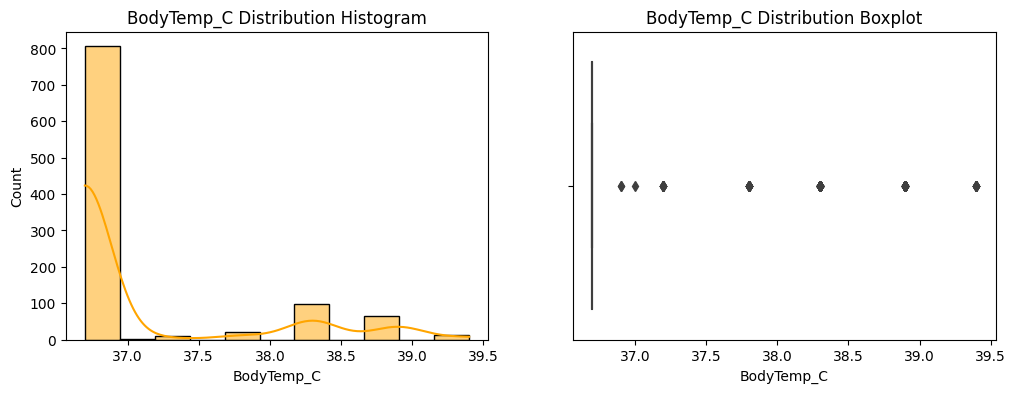

In [ ]:
# Iterate through each column for univariate analysis
columns = df_org.columns[:len(df_org.columns) - 1]
for i in range(len(columns)):
  num_plot(df_org, columns[i])

On Observation, almost all variables have outlier that cause skewed distribution.

 **Bivariate Analysis**

Bivariate analysis is a method used to explore the relationship between two variables, aiming to identify any correlation and its strength. This analysis involves studying one dependent variable and one independent variable

Bivariate analysis with the Risk level

<Figure size 800x500 with 0 Axes>

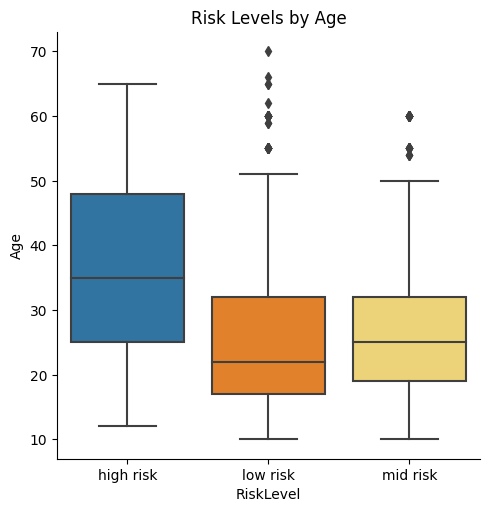

<Figure size 800x500 with 0 Axes>

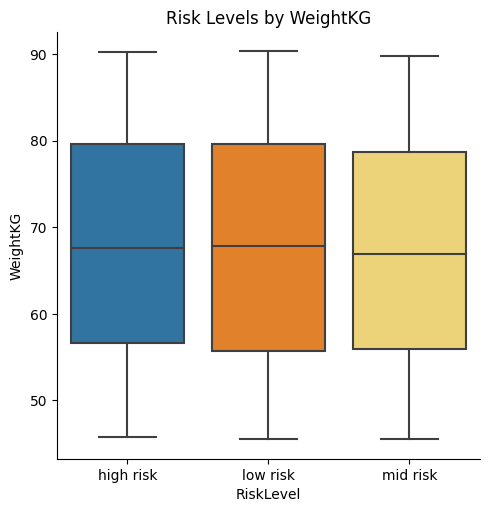

<Figure size 800x500 with 0 Axes>

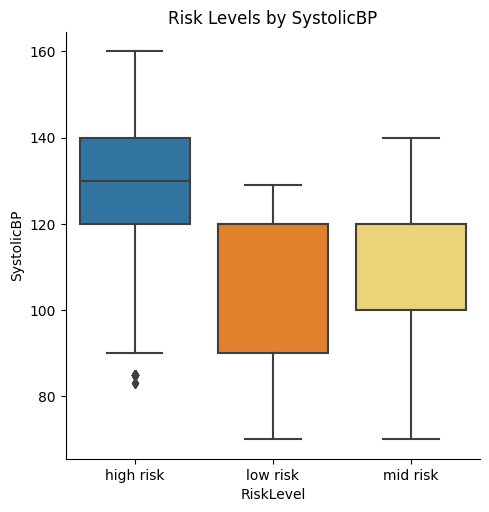

<Figure size 800x500 with 0 Axes>

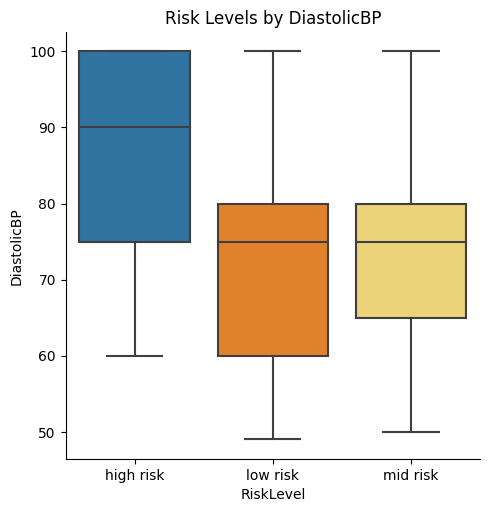

<Figure size 800x500 with 0 Axes>

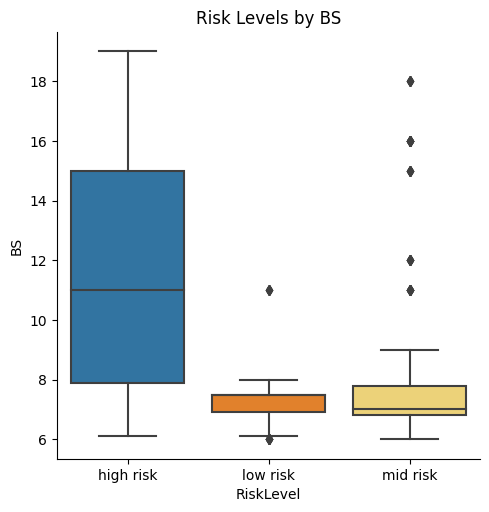

<Figure size 800x500 with 0 Axes>

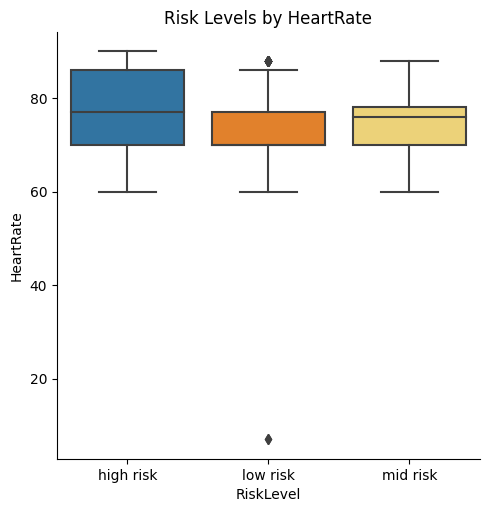

<Figure size 800x500 with 0 Axes>

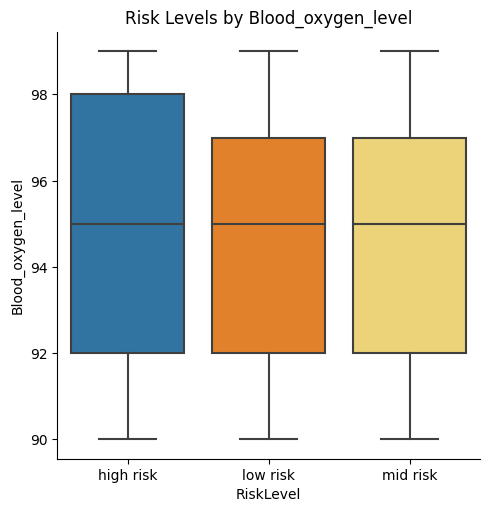

<Figure size 800x500 with 0 Axes>

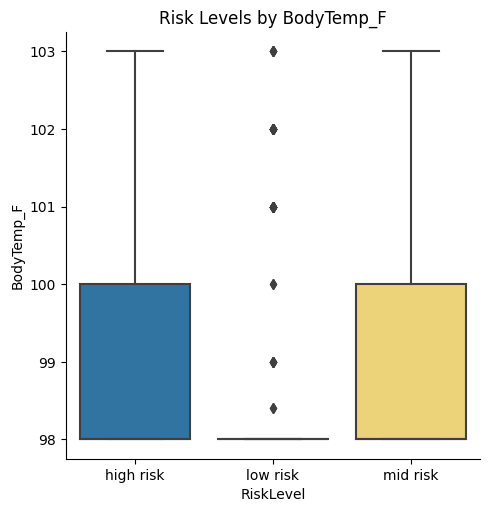

<Figure size 800x500 with 0 Axes>

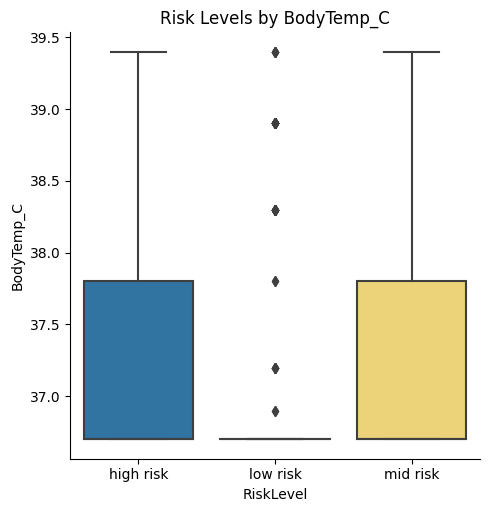

In [ ]:
# Iterate through each column for bivariate analysis (comparing RiskLevel with other numerical columns)
columns = df_org.columns[:len(df_org.columns) - 1]
for i in range(len(columns)):
    plt.figure(figsize = (8, 5))
    sns.catplot(data = df_org,
                x = "RiskLevel",
                y = columns[i],
                kind = "box",
                palette = ["#1f77b4", "#ff7f0e", "#ffdd66"]).set(title = f"Risk Levels by {columns[i]}");

**Visualize the relationships between different pairs of variables in the dataset**

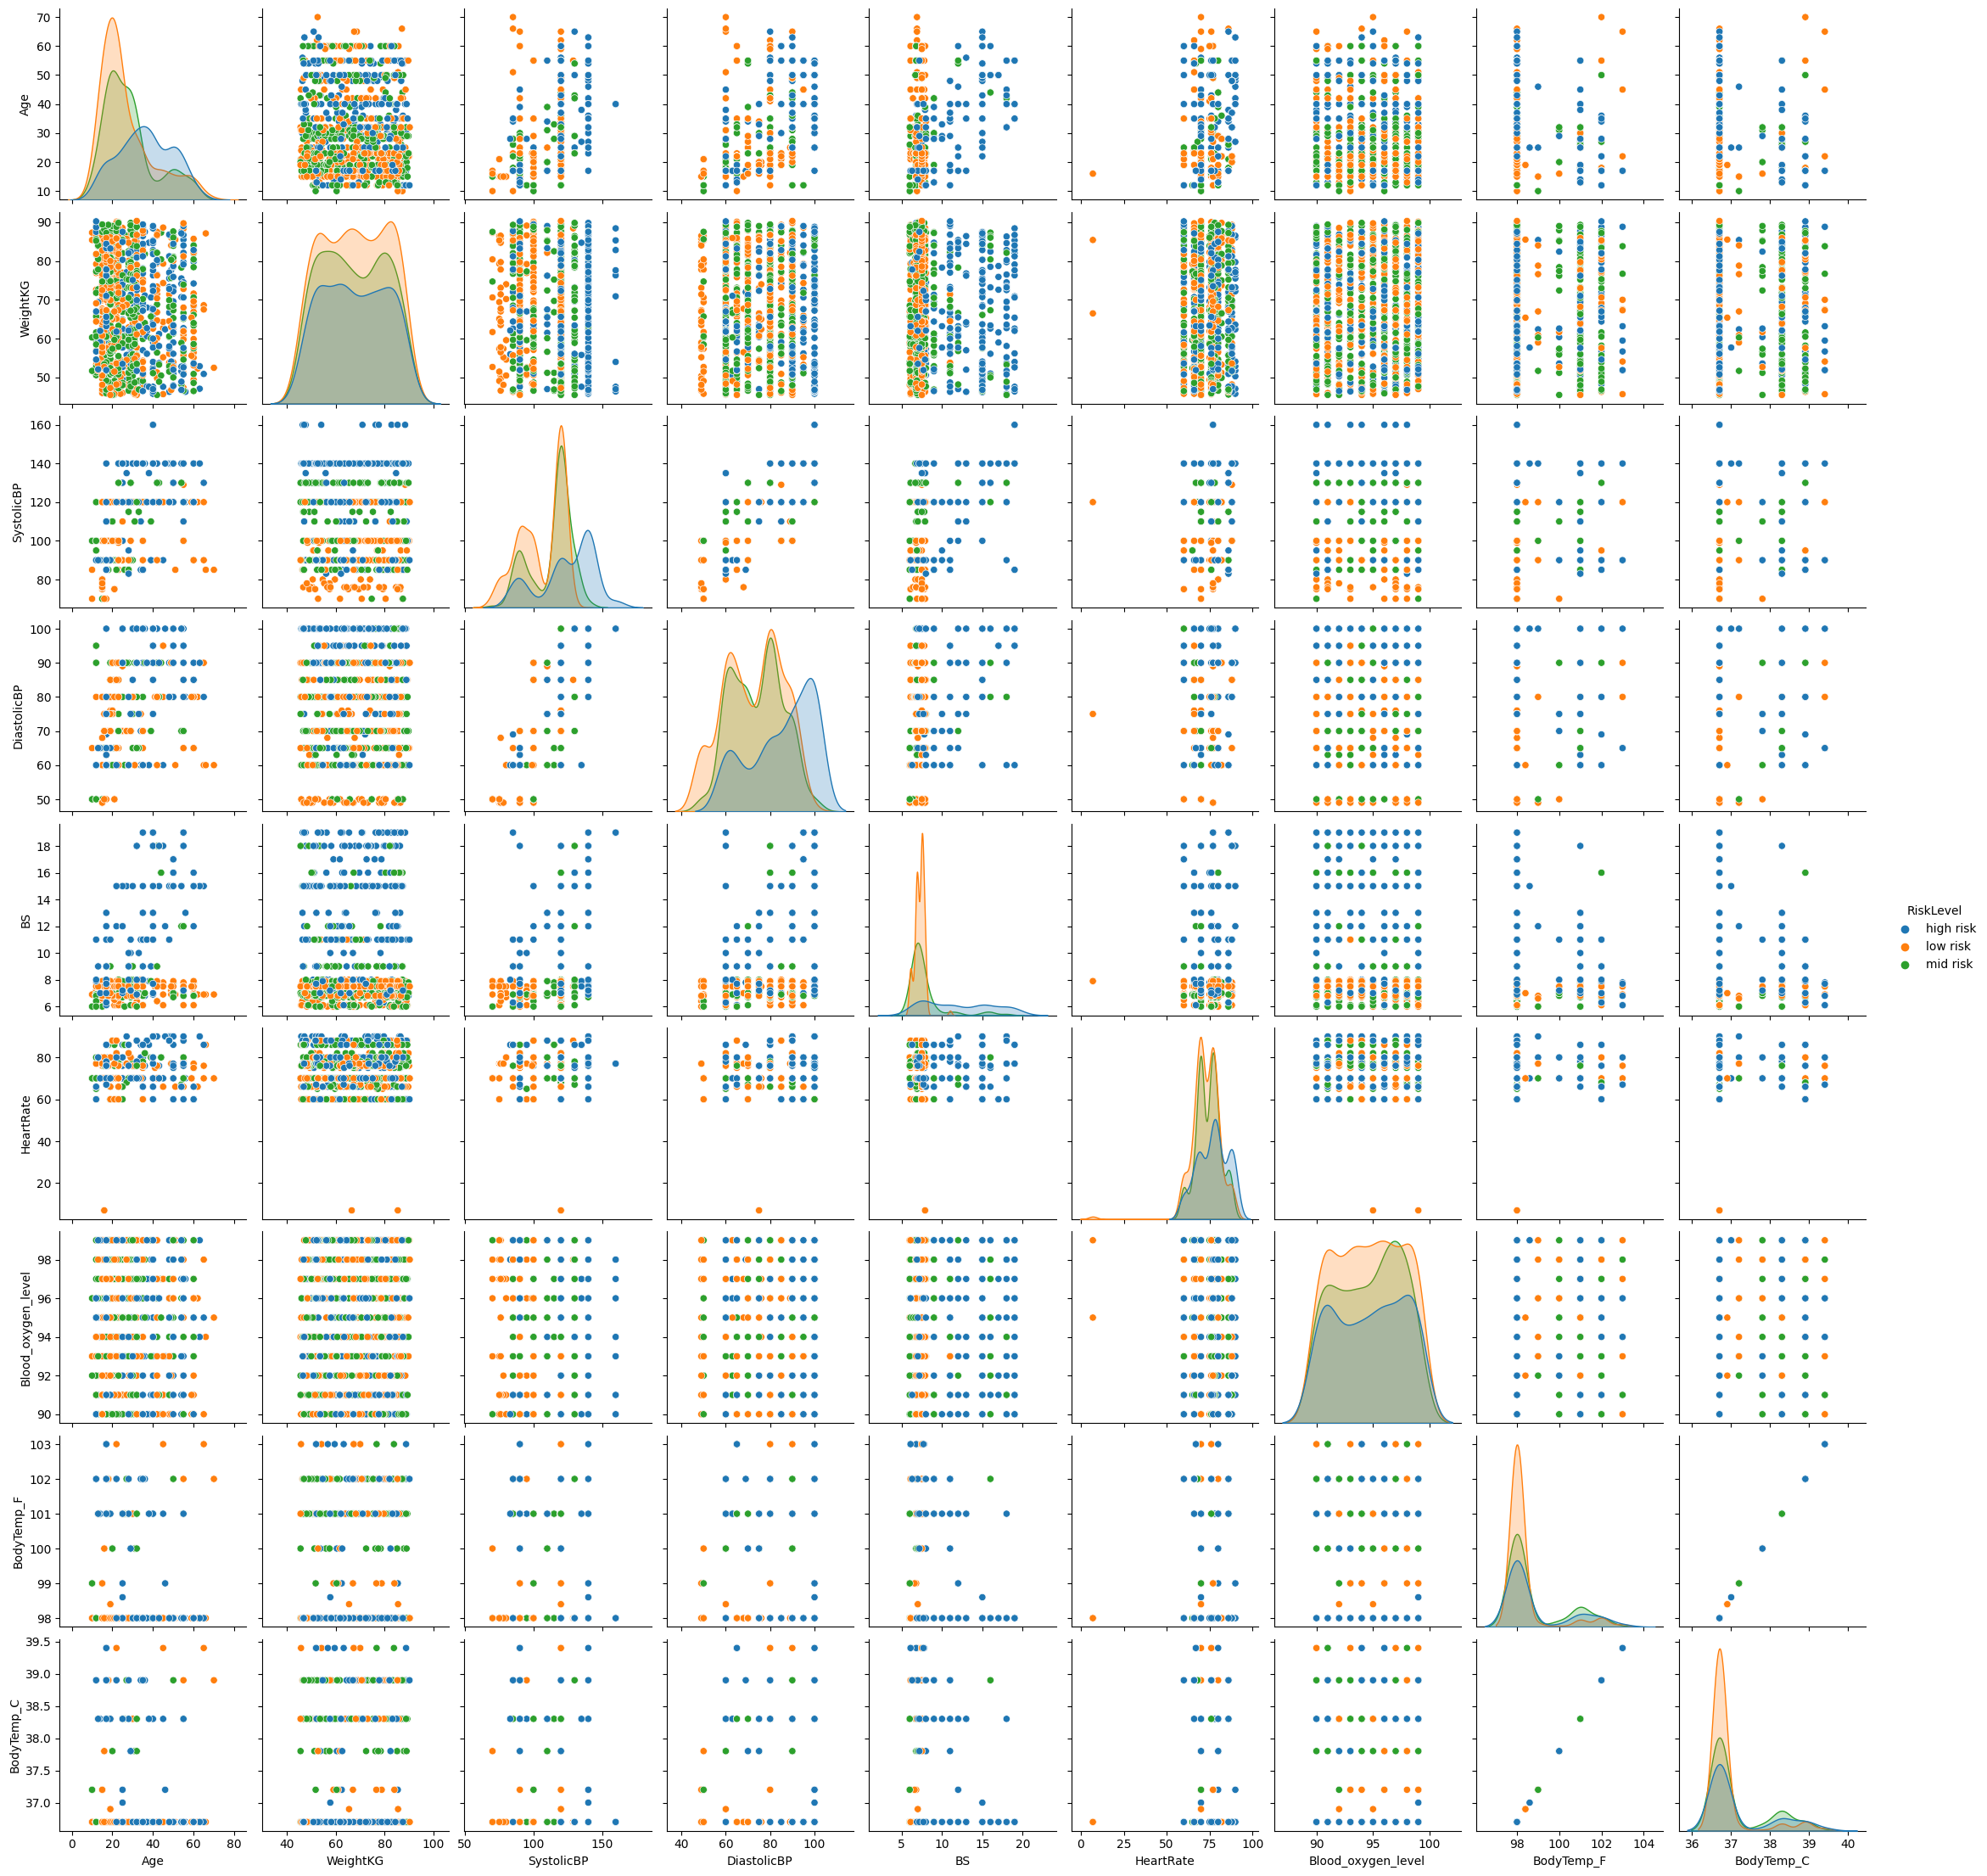

In [ ]:
# General distribution
sns.pairplot(df_org.iloc[:,:], hue = "RiskLevel");

The above pair plot display scatterplots for all pairs of numeric variables, and the points in these scatterplots are colored according to their associated "RiskLevel." This provides insights into the relationships between variables and how they are distributed in different risk levels.


### **OBSERVATIONS:**
Our data is free from Null and missing values. However, we have come across one duplicate record.

Inferences made from our data are as follows:

1. Age: Women below the age of 25 are at lower risk levels.
2. Weight, Blood oxygen and Body Temperature do not appear to have an impact on the risk
3. The higher the Systolic and Diastolic BP, higher the health risk
4. Women with blood glucose less than 8 appear to have lower health risk
5. Most women appear to have a body temperature of 36.6 C, which is normal body temperature
6. The higher the heart rate, higher the health risk

We will perform outliers analysis of the data and handle it accordingly in the next section.


# II. Outlier Detection and Handling

## Select your Outlier Detection and Handling Methods:

Outliers are the values that deviate significantly from the rest of the data in a dataset. Detecting and handling outliers is important in data preprocessing to ensure that they do not unduly influence the results of statistical analyses or machine learning models.
When handling outliers, it's essential to consider the nature of our data and the goals of our analysis or modeling. It's often a good practice to explore the impact of outlier handling methods on the overall results and choose the approach that best suits our specific use case.

Here we have performed outlier detection using:

* **Inter Quartile Range**

  The interquartile range (IQR) is a measure of how spread out a set of data points are. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a dataset. Handling outliers using the IQR is a robust method because it is less sensitive to extreme values than methods based on the mean and standard deviation.

* **Z-Score**

  It is a statistical measure that describes a value's relation to the mean of a group of values. It is often used to determine how many standard deviations a particular data point is from the mean in a dataset.The z-score indicates whether a particular data point is below (negative z-score) or above (positive z-score) the mean and how far away it is from the mean in terms of standard deviations.



We handled the outliers detected using:

**Clipping**

We clip extreme values by setting a minimum and maximum threshold for values. Values beyond these thresholds are capped at the threshold values.

## Apply Outlier Detection and Handling Methods:

Implement the Outlier Detection and Handling methods on the original data.

**Outlier Detection**

1. Inter Quartile Range

In [ ]:
def outlier_calc(df_org):
    # Calculate Q1, Q3, and IQR for all features at once
    q1 = df_org.quantile(0.25)
    q3 = df_org.quantile(0.75)
    iqr = q3 - q1

    # Calculate the lower and upper fences for all features
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)

    # Combine the results into a DataFrame
    fence_list = pd.DataFrame({
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "lower_fence": lower_fence,
        "upper_fence": upper_fence
    }).transpose()

    return fence_list

In [ ]:
outlier_calc(df_org.iloc[:, 0:9])

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
q1           19.0    56.025       100.0         65.0  6.90       70.0   
q3           39.0    79.375       120.0         90.0  8.00       80.0   
iqr          20.0    23.350        20.0         25.0  1.10       10.0   
lower_fence -11.0    21.000        70.0         27.5  5.25       55.0   
upper_fence  69.0   114.400       150.0        127.5  9.65       95.0   

             Blood_oxygen_level  BodyTemp_F  BodyTemp_C  
q1                         92.0        98.0        36.7  
q3                         97.0        98.0        36.7  
iqr                         5.0         0.0         0.0  
lower_fence                84.5        98.0        36.7  
upper_fence               104.5        98.0        36.7

In [ ]:
# How many outliers of each feature?
# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Numeric columns for outlier detection
numeric_columns = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F', 'BodyTemp_C']

# Detect outliers for each numeric column
outlier_detection_results = {}
for col in numeric_columns:
    outlier_detection_results[col] = detect_outliers_iqr(df_org, col)

# Output the results: Number of outliers for each column
outliers_summary = {col: len(outlier_detection_results[col]) for col in numeric_columns}
outliers_summary


{'Age': 1,
 'WeightKG': 0,
 'SystolicBP': 10,
 'DiastolicBP': 0,
 'BS': 210,
 'HeartRate': 2,
 'Blood_oxygen_level': 0,
 'BodyTemp_F': 210,
 'BodyTemp_C': 210}

In [ ]:
# Calculate the total count of outliers across all columns before capping
total_outliers_count = sum(outliers_summary.values())
total_outliers_count

643

The total number of outliers is 643. However, since the rows that have BodyTemp_F have errors in BodyTemp_C, the number of outliers is 433

2. Z-Score

In [ ]:
#Z Score Calculation
from scipy.stats import zscore
df_2 = df_org.iloc[:, :-1]
# Calculate z-scores for each column
df_zscores = df_2.apply(zscore)

# Display the DataFrame with z-scores
print(df_zscores)
threshold = 3
# Find and display outliers
outliers = (df_zscores > threshold) | (df_zscores < -threshold)
outliers_df = df_2[outliers.any(axis=1)]

print("Dataframe with outliers:")
print(outliers_df)

outliers_df = df_org[outliers.any(axis=1)]

# Count outliers
outliers_count = outliers.sum()

# Display the count of outliers for each column
print("Count of outliers for each column:")
print(outliers_count)

           Age  WeightKG  SystolicBP  DiastolicBP        BS  HeartRate  \
0    -0.361738  0.302850    0.913396     0.255023  1.700156   1.446956   
1     0.380777  1.443962    1.457027     0.975539  1.700156  -0.532088   
2    -0.064732 -0.799710   -1.261127    -0.465493  0.250676   0.704815   
3     0.009519  1.027610    1.457027     0.615281 -0.627796  -0.532088   
4     0.380777 -1.539891    0.369765    -1.186009 -1.418421   0.210054   
...        ...       ...         ...          ...       ...        ...   
1009 -0.584493 -0.452751    0.369765    -1.186009  1.700156   0.704815   
1010  1.865807 -1.300874    0.369765     0.975539  1.700156  -1.768990   
1011  0.380777  1.043031   -1.532942    -1.186009  1.700156   1.446956   
1012  0.974789 -0.738029    0.369765     0.975539  1.700156  -0.532088   
1013  0.158022 -1.092699    0.369765    -0.825751 -1.506268   0.210054   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  
0              -1.234020   -0.485215   -0.483797  
1        

Z score is influenced by extreme values and can be skewed if the dataset has outliers, while IQR focuses on the central part of the data. Distribution Independence: IQR doesn't assume a specific distribution of the data. It relies on the quartiles, which are based on the rank order of the data, making it suitable for non-normally distributed datasets.

Applicability to Skewed Data: In cases where the data distribution is skewed or not normal, IQR can be a more reliable measure for identifying outliers.

Hence we go ahead with the results IQR method

**Outlier Handling**

**Clipping**


Handling outliers in BodyTemp_F, BodyTemp_C and BS

In [ ]:
# Display the actual outlier values for BS and BodyTemp_F
bs_outliers = outlier_detection_results['BS']
bodytemp_f_outliers = outlier_detection_results['BodyTemp_F']

bs_outliers, bodytemp_f_outliers


(      Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
 0      25      71.6         130           80  15.0         86   
 1      35      86.4         140           90  13.0         70   
 7      35      68.2          85           60  11.0         86   
 9      42      79.9         130           80  18.0         70   
 14     48      60.4         120           80  11.0         88   
 ...   ...       ...         ...          ...   ...        ...   
 1008   48      58.0         120           80  11.0         88   
 1009   22      61.8         120           60  15.0         80   
 1010   55      50.8         120           90  18.0         60   
 1011   35      81.2          85           60  19.0         86   
 1012   43      58.1         120           90  18.0         70   
 
       Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
 0                     91        98.0        36.7  high risk  
 1                     96        98.0        36.7  high risk  
 7               

In [ ]:
# Function to cap outliers based on IQR
def cap_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_org[feature] = data[feature].clip(lower_bound, upper_bound)
    return data

# Cap outliers for BS, BodyTemp_C, BodyTemp_F and SystolicBP using IQR method
data_capped = df_org.copy()
data_capped = cap_outliers(data_capped, 'BS')

# Cap the BodyTemp_F, BodyTemp_C and SystolicBP  based on clinically accepted ranges
# Assuming typical fever threshold as the upper cap (100.4°F)
data_capped['BodyTemp_F'] = data_capped['BodyTemp_F'].clip(lower=data_capped['BodyTemp_F'].min(), upper=100.4)
data_capped['BodyTemp_C'] = data_capped['BodyTemp_C'].clip(lower=data_capped['BodyTemp_C'].min(), upper=38)

data_capped['SystolicBP'] = data_capped['SystolicBP'].clip(lower=data_capped['SystolicBP'].min(), upper=160)

# Check the changes
bs_capped_changes = (data_capped['BS'].min(), data_capped['BS'].max())
bodytemp_f_capped_changes = (data_capped['BodyTemp_F'].min(), data_capped['BodyTemp_F'].max())
bodytemp_c_capped_changes = (data_capped['BodyTemp_C'].min(), data_capped['BodyTemp_C'].max())
systolicBP_changes = (data_capped['SystolicBP'].min(), data_capped['SystolicBP'].max())

print("Blood Sugar Range", bs_capped_changes)
print("Body Temp Farenheit Range", bodytemp_f_capped_changes)
print("Body Temp Celsius Range", bodytemp_c_capped_changes)
print("Systolic BP Range", systolicBP_changes)

Blood Sugar Range (6.0, 19.0)
Body Temp Farenheit Range (98.0, 100.4)
Body Temp Celsius Range (36.7, 38.0)
Systolic BP Range (70, 160)


## Show your revised Data after removing Outliers:

Show your revised data comparing to original data

**Original Data**

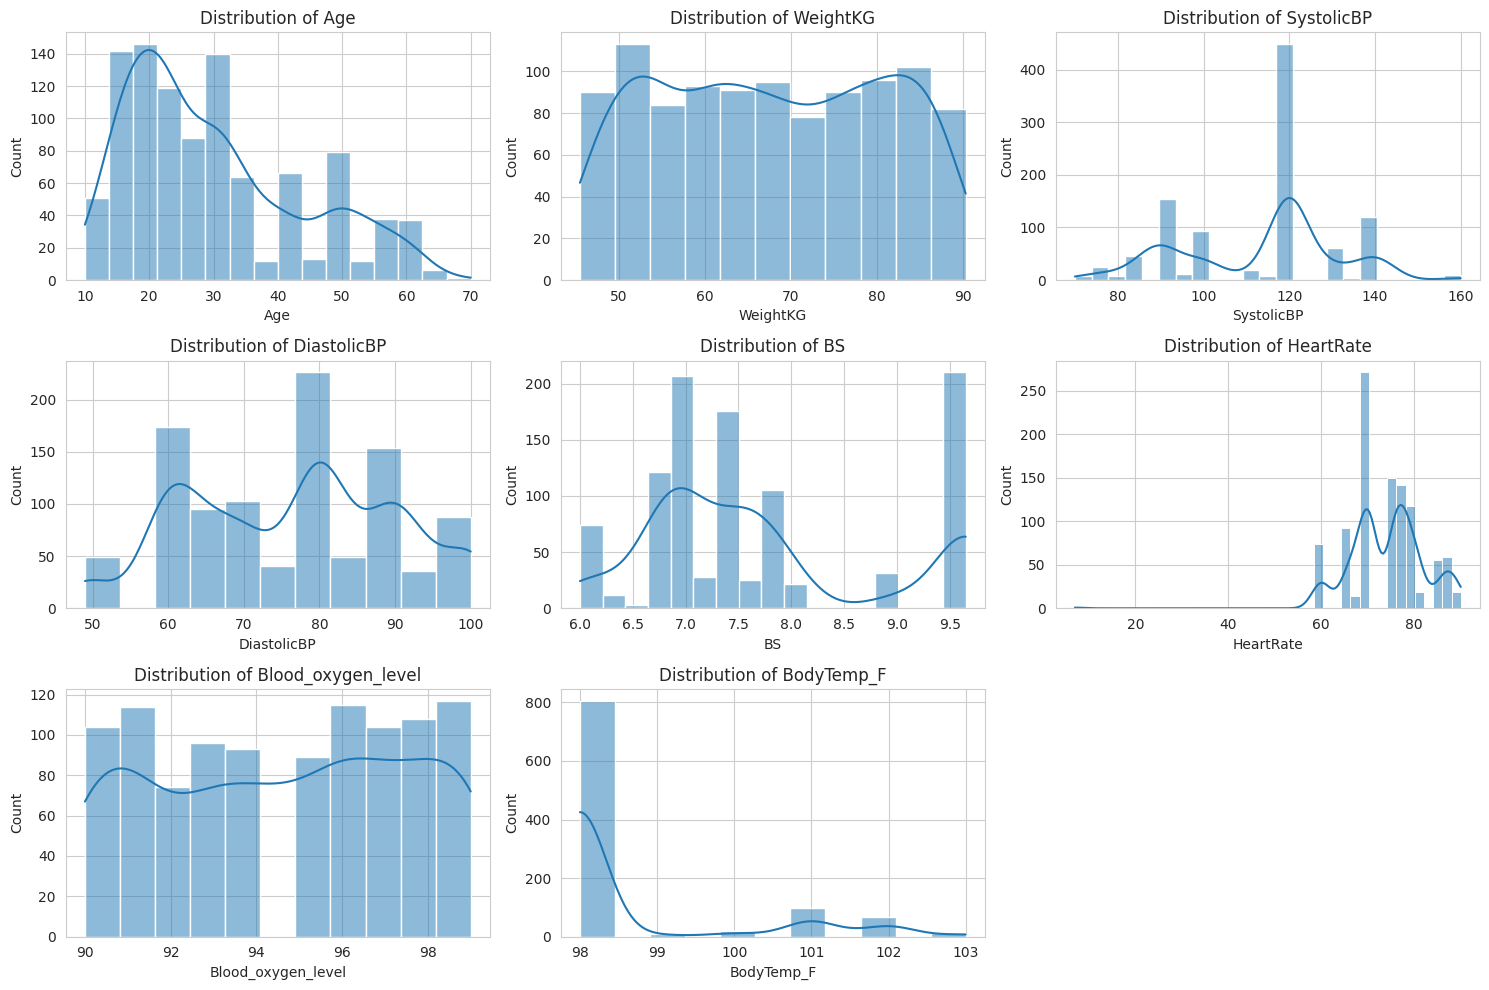

In [ ]:
sns.set_style("whitegrid")

# List of columns for which we will plot histograms
hist_columns = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F']

# Plot histograms for each of the specified columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(hist_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_org[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

**After Outlier Handling**

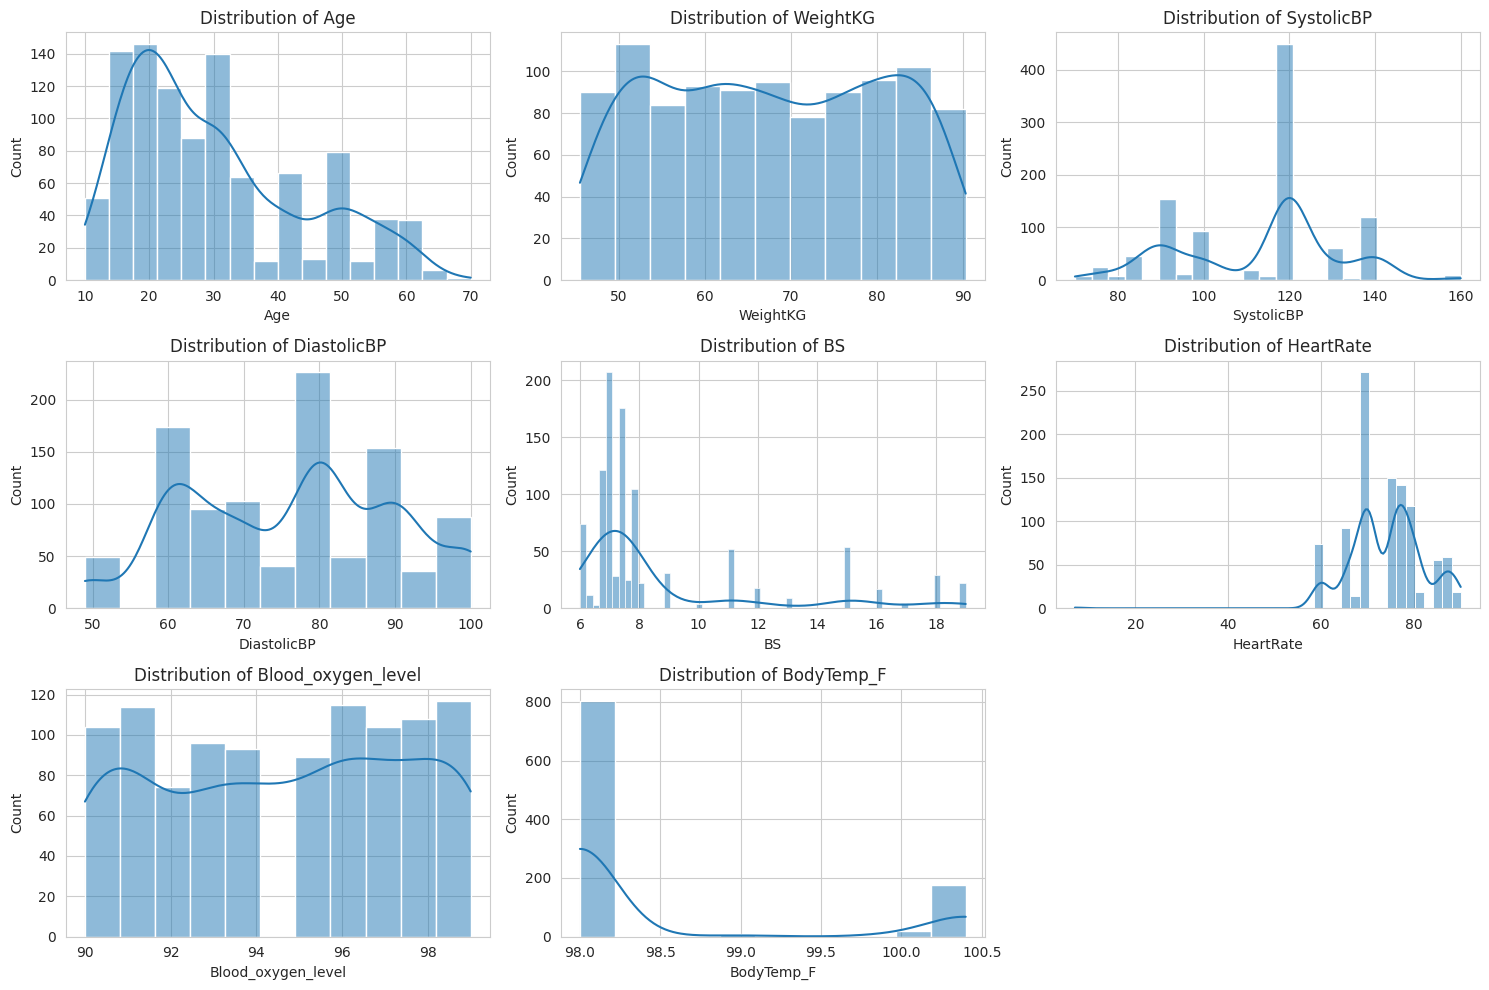

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns for which we will plot histograms
hist_columns = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F']

# Plot histograms for each of the specified columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(hist_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_capped[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


# III. Data Preprocessing

## **Choose Your Data Preprocessing Methods:**

We perform the following preprocessing methods:

*   Encoding of Risk Level column : The Dataset contains RiskLevel objects which are encoded into numerical values using label encoding for analyzing.


*   Handling of incorrect and duplicate values : We handle the duplicate record found earlier by removing it.


## Apply your Data Preprocessing Methods:

Implement the chosen preprocessing method on the original data.

In [ ]:
data_clean = data_capped.copy()

**Converting categorical values in the "RiskLevel" column of a DataFrame into numerical values**

In [ ]:
# Encoding for original dataset
# "low risk": 0,
# "mid risk": 1,
# "high risk": 2
risk_map = {"low risk": 0, "mid risk": 1, "high risk": 2}
df_org["RiskLevel"] = df_org["RiskLevel"].map(risk_map)
df_org

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  9.65         86   
1      35      86.4         140           90  9.65         70   
2      29      57.3          90           70  8.00         80   
3      30      81.0         140           85  7.00         70   
4      35      47.7         120           60  6.10         76   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  9.65         80   
1010   55      50.8         120           90  9.65         60   
1011   35      81.2          85           60  9.65         86   
1012   43      58.1         120           90  9.65         70   
1013   32      53.5         120           65  6.00         76   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       101.0        38.3          1  

[1014 rows x 10 columns]

In [ ]:
# Encoding outlier handled dataset
# "low risk": 0,
# "mid risk": 1,
# "high risk": 2
risk_map = {"low risk": 0, "mid risk": 1, "high risk": 2}
data_clean["RiskLevel"] = data_clean["RiskLevel"].map(risk_map)
data_clean

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0         86   
1      35      86.4         140           90  13.0         70   
2      29      57.3          90           70   8.0         80   
3      30      81.0         140           85   7.0         70   
4      35      47.7         120           60   6.1         76   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0         80   
1010   55      50.8         120           90  18.0         60   
1011   35      81.2          85           60  19.0         86   
1012   43      58.1         120           90  18.0         70   
1013   32      53.5         120           65   6.0         76   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       100.4        38.0          1  

[1014 rows x 10 columns]

1. Body Temperature conversion from Celsius to Farenheit

In [ ]:
# Cross-checking the BodyTemp_F and BodyTemp_C columns for consistency
# The formula to convert Celsius to Fahrenheit is: (Celsius * 9/5) + 32 = Fahrenheit
# We will add a small tolerance for any minor rounding differences that may occur in the dataset

# Calculate the expected Fahrenheit values from the Celsius values in the dataset

expected_bodytemp_f = (data_clean['BodyTemp_C'] * 9/5) + 32

# Check for discrepancies beyond a small tolerance (e.g., 0.1 degree)
temperature_discrepancy = abs(expected_bodytemp_f - data_clean['BodyTemp_F']) > 0.1

# Count the number of discrepancies
num_discrepancies = temperature_discrepancy.sum()

# Display any rows where the discrepancy exists
discrepancy_rows = data_clean[temperature_discrepancy]

In [ ]:
discrepancy_rows

Empty DataFrame
Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
Index: []

2. Heart Rate Range

To take Bradycardia patients into account we placed a threshold of 40 bpm

In [ ]:
# Check the entry/entries with very low heart rate
low_heart_rate = data_clean[data_clean['HeartRate'] < 40]  # 40 bpm is a threshold for bradycardia

num_discrepancies, discrepancy_rows, low_heart_rate

(0,
 Empty DataFrame
 Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
 Index: [],
      Age  WeightKG  SystolicBP  DiastolicBP   BS  HeartRate  \
 499   16      66.5         120           75  7.9          7   
 908   16      85.4         120           75  7.9          7   
 
      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
 499                  99        98.0        36.7          0  
 908                  95        98.0        36.7          0  )

Upon checking for consistency between BodyTemp_F and BodyTemp_C, we found no discrepancies in the dataset within the given tolerance, which is good news.

However, we have identified two entries where the HeartRate is recorded as 7 beats per minute. This is not physiologically plausible for a living person and likely represents a data entry error. Given that these are likely incorrect, we will need to remove these entries and replace these entries with a mean or median heart rate.

The extreme low heart rate values have been replaced with the mean heart rate of approximately 74.43 beats per minute. This change has been applied to the two identified records.

In [ ]:
# Calculate the mean heart rate, excluding the extreme low values
mean_heart_rate = data_clean[data_clean['HeartRate'] >= 40]['HeartRate'].mean()

# Replace the extreme low heart rate values with the mean
data_clean.loc[data_clean['HeartRate'] < 40, 'HeartRate'] = mean_heart_rate

# Verify the replacement
low_heart_rate_replaced = data_clean.loc[[499, 908], 'HeartRate']
mean_heart_rate, low_heart_rate_replaced

(74.43478260869566,
 499    74.434783
 908    74.434783
 Name: HeartRate, dtype: float64)

Check if all the values fall inside their respective ranges range

In [ ]:
# Checking for invalid values in numerical columns

# Define the plausible ranges for each feature based on physiological norms and common sense
plausible_ranges = {
    'SystolicBP': (70, 160),  # Systolic blood pressure range (mmHg)
    'DiastolicBP': (40, 100),  # Diastolic blood pressure range (mmHg)
    'HeartRate': (40, 200),  # Heart rate range (bpm)
    'BodyTemp_F': (97, 100.4),  # Normal body temperature range (°F)
    'BodyTemp_C': (35,38),
    'Age': (12, 54),  # Typical childbearing age range
    'BS' : (6,11.1)

}

# Find and display invalid values for each feature
invalid_values = {}
for feature, (low, high) in plausible_ranges.items():
    invalid_values[feature] = data_clean[
        (data_clean[feature] < low) |
        (data_clean[feature] > high)
    ][feature]

invalid_values

{'SystolicBP': Series([], Name: SystolicBP, dtype: int64),
 'DiastolicBP': Series([], Name: DiastolicBP, dtype: int64),
 'HeartRate': Series([], Name: HeartRate, dtype: float64),
 'BodyTemp_F': Series([], Name: BodyTemp_F, dtype: float64),
 'BodyTemp_C': Series([], Name: BodyTemp_C, dtype: float64),
 'Age': 19      10
 36      60
 37      55
 54      60
 77      55
         ..
 968     55
 982     55
 1001    60
 1002    55
 1010    55
 Name: Age, Length: 86, dtype: int64,
 'BS': 0       15.0
 1       13.0
 9       18.0
 16      15.0
 20      18.0
         ... 
 1003    16.0
 1009    15.0
 1010    18.0
 1011    19.0
 1012    18.0
 Name: BS, Length: 154, dtype: float64}

Observations:

1. SystolicBP and DiastolicBP: No values fell outside the plausible physiological range we defined.
2. HeartRate: All values are now within the plausible range after we replaced the extreme low values with the mean heart rate.
3. BodyTemp_F: The outlier values have been handled within the range (98.0, 100.4)
4. Age: There are 86 entries with ages outside the typical childbearing age range of 12 to 45 years. The presence of ages like 10 years is clearly invalid, while ages above 45 could be possible but are very rare and might warrant further investigation, we are setting the range from 12 to 60.




In [ ]:
data_clean[(data_clean['Age'] <= 60) & (data_clean['Age'] >= 12)]

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0       86.0   
1      35      86.4         140           90  13.0       70.0   
2      29      57.3          90           70   8.0       80.0   
3      30      81.0         140           85   7.0       70.0   
4      35      47.7         120           60   6.1       76.0   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0       80.0   
1010   55      50.8         120           90  18.0       60.0   
1011   35      81.2          85           60  19.0       86.0   
1012   43      58.1         120           90  18.0       70.0   
1013   32      53.5         120           65   6.0       76.0   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       100.4        38.0          1  

[1002 rows x 10 columns]

In [ ]:
(data_clean[(data_clean['Age'] > 60) | (data_clean['Age'] < 12)]).count()

Age                   12
WeightKG              12
SystolicBP            12
DiastolicBP           12
BS                    12
HeartRate             12
Blood_oxygen_level    12
BodyTemp_F            12
BodyTemp_C            12
RiskLevel             12
dtype: int64

In [ ]:
# Investigating the entry with an age of 60
# Given the dataset context, it is very likely to be an error, so we will remove this entry
data_clean = data_clean[(data_clean['Age'] <= 60) & (data_clean['Age'] >= 12)]

# Verify the removal of the outlier age and the flagging of high temperatures
outlier_age_removed = data_clean[(data_clean['Age'] > 60) | (data_clean['Age'] < 12)]

outlier_age_removed

Empty DataFrame
Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
Index: []

**Removing Duplicates**

In [ ]:
# Remove the identified exact duplicate
maternal_health_df_cleaned = data_clean.drop_duplicates()
maternal_health_df_cleaned

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0       86.0   
1      35      86.4         140           90  13.0       70.0   
2      29      57.3          90           70   8.0       80.0   
3      30      81.0         140           85   7.0       70.0   
4      35      47.7         120           60   6.1       76.0   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0       80.0   
1010   55      50.8         120           90  18.0       60.0   
1011   35      81.2          85           60  19.0       86.0   
1012   43      58.1         120           90  18.0       70.0   
1013   32      53.5         120           65   6.0       76.0   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       100.4        38.0          1  

[1001 rows x 10 columns]

## Show your Preprocssed Data:

Comparing preprocessed data to the original data

1.Heart Rate

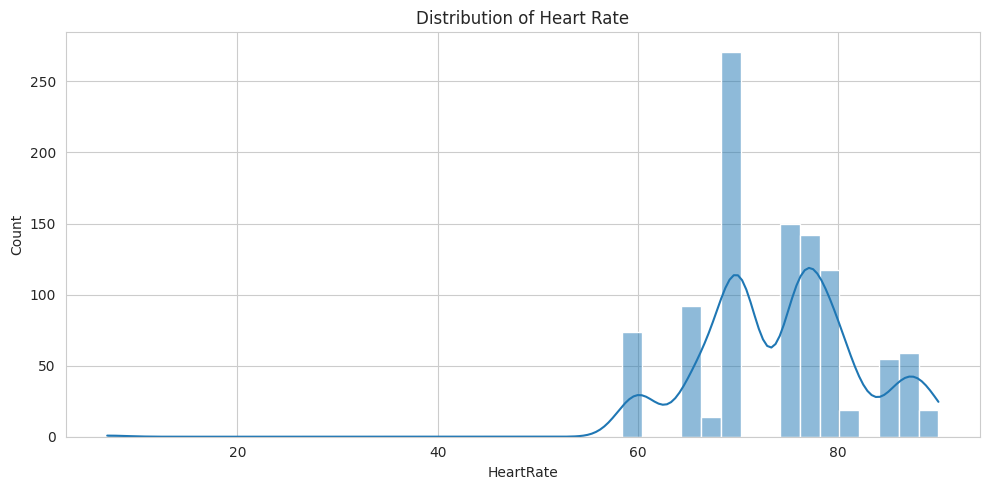

In [ ]:
#before
plt.figure(figsize=(10, 5))
sns.histplot(df_org['HeartRate'], kde=True)
plt.title(f'Distribution of Heart Rate')
plt.tight_layout()

plt.show()

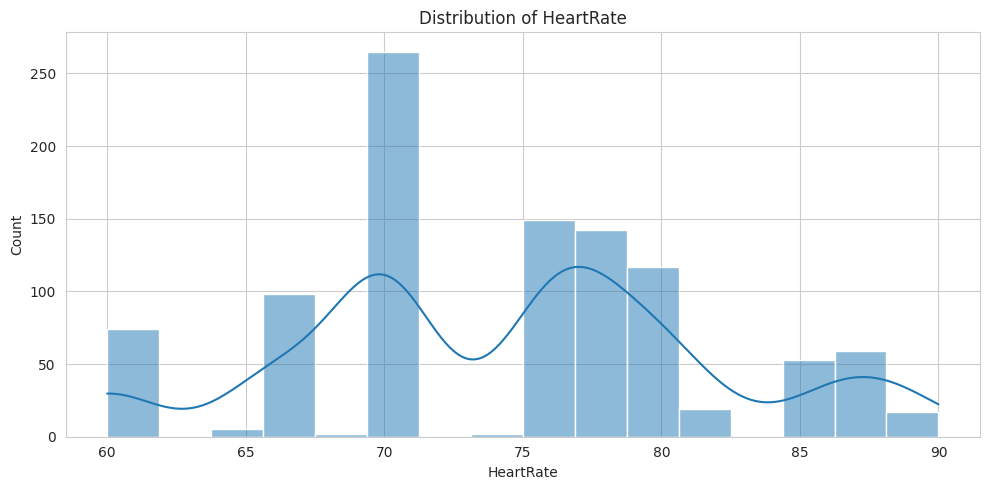

In [ ]:
#after
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['HeartRate'], kde=True)
plt.title(f'Distribution of HeartRate')
plt.tight_layout()

plt.show()

2. Age

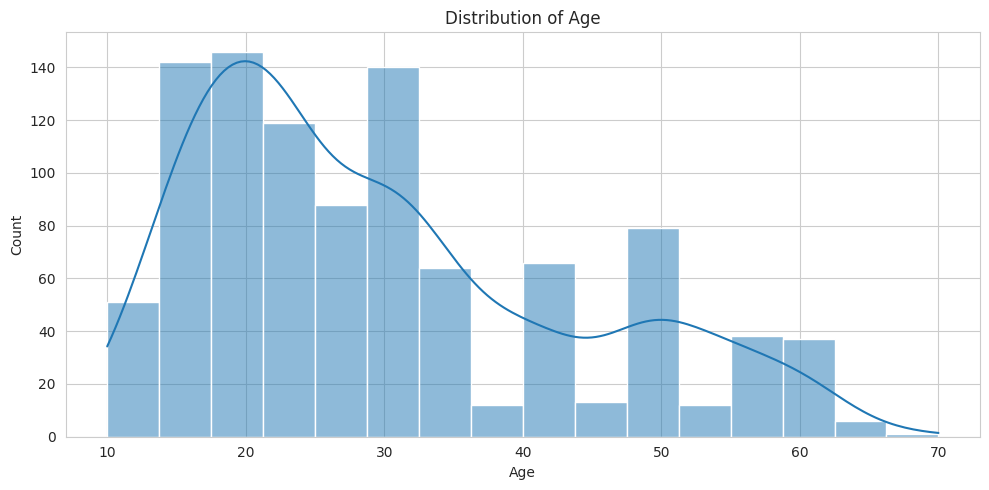

In [ ]:
#before
plt.figure(figsize=(10, 5))
sns.histplot(df_org['Age'], kde=True)
plt.title(f'Distribution of Age')
plt.tight_layout()

plt.show()

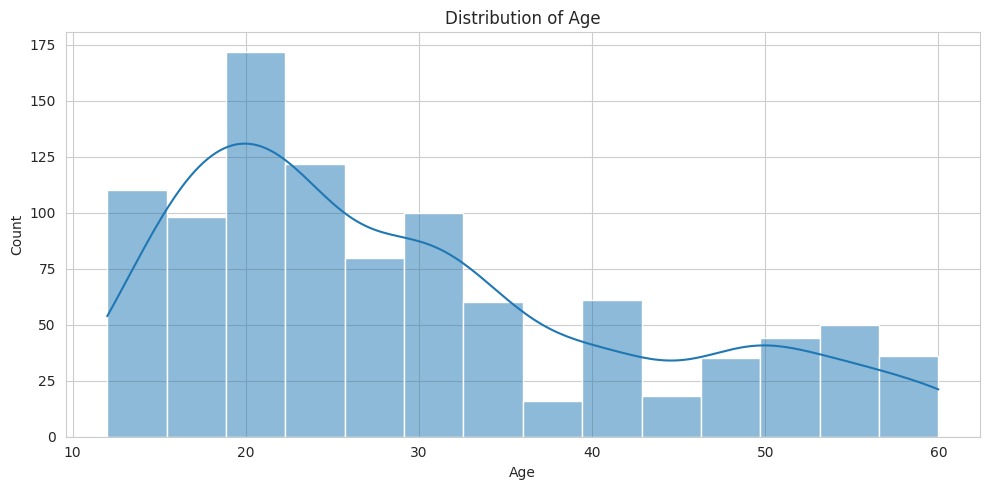

In [ ]:
#after
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Age'], kde=True)
plt.title(f'Distribution of Age')
plt.tight_layout()

plt.show()

3. BodyTemp_F

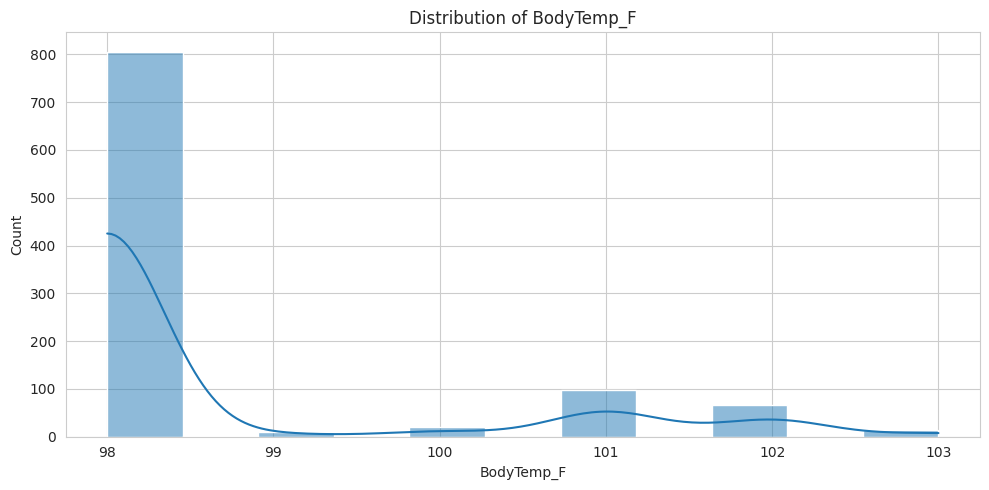

In [ ]:
#before
plt.figure(figsize=(10, 5))
sns.histplot(df_org['BodyTemp_F'], kde=True)
plt.title(f'Distribution of {col}')
plt.tight_layout()

plt.show()

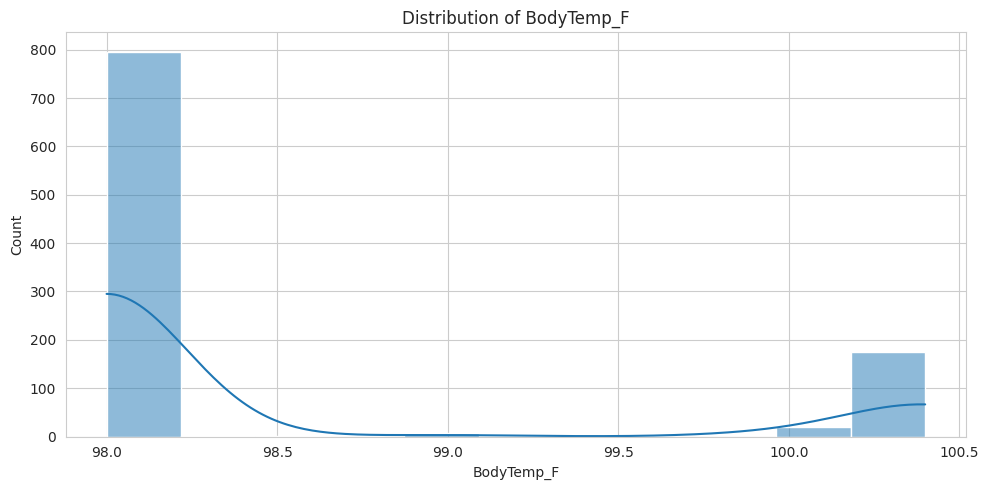

In [ ]:
#after
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['BodyTemp_F'], kde=True)
plt.title(f'Distribution of {col}')
plt.tight_layout()

plt.show()

After removing the inconsistent data, the distribution is shown above

# IV. Preparation of Learning Data

## Split the Data:
Divide the dataset into learning, training and testing datasets.

In [ ]:
# Original Dataset
X = df_org.drop("RiskLevel", axis=1)
y = df_org.RiskLevel
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Processed Dataset
X_proc = maternal_health_df_cleaned.drop(["RiskLevel","BodyTemp_C"], axis=1)
y_proc = maternal_health_df_cleaned.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = train_test_split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processed data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 760 train data and 254 test data

Processed data has 800 train data and 201 test data


# V. Tasks to do if Feature Selection is Relevant to your Project

## Choose Your Feature Selection Methods:

There are various feature selection methods, and the choice depends on the dataset and the problem. Common techniques include:
    
- Filter Methods: Evaluate features based on statistical measures, such as correlation, information gain, or chi-square.
- Wrapper Methods: Use a specific machine learning algorithm to evaluate subsets of features based on their impact on model performance.
- Embedded Methods: Feature selection is integrated into the model training process, as seen in regularization techniques.
        
We have used the following methods:

**Filter Methods**
1. <u>Correlation Matrix</u>: This method evaluates the importance of features based on their correlation with the target variable and removes redundant features that are highly inter-correlated(multicollinearity). High correlation with the target suggests importance, while multicollinearity may warrant feature removal.

2. <u>Chi Square Method</u>: The Chi-Square method checks the independence of categorical variables in feature selection, identifying important features for predicting the target by determining their dependency on the target variable.

**Wrapper Methods**
3. <u>Forward Feature Elimination</u>: This is an iterative approach in which features are incrementally added to the model, and kept if they improve model performance. The process starts with no features and adds them until there is no improvement in model performance.

4. <u>Backward Feature Elimination</u>: This method is the reverse of forward elimination. It starts with all the features and iteratively removes the least significant feature at each step. The process continues until the removal of additional features does not improve the model performance.

5. <u>Recursive Feature Elimination</u>: The RFE (Recursive Feature Elimination) scores indicate the ranking of features based on their importance or contribution to the model's performance. The lower the RFE score, the more important the feature is considered by the RFE algorithm.
**Embedded Methods**
6. <u>Random Forest Importance</u>: Random Forest Importance is a technique that measures the impact of each feature in a random forest model, assigning importance scores based on the contribution of features to the model's predictive performance. Higher scores indicate more influential features in the ensemble.

7. <u>Regularization L1 (LASSO)</u>: LASSO (Least Absolute Shrinkage and Selection Operator) is a regularization technique that adds a penalty term to the linear regression algorithm, enforcing sparsity by shrinking some coefficients to exactly zero. This encourages feature selection, making it useful for models with a large number of features.

8. <u>Regularization L2 (Ridge)</u>: Ridge regularization is a technique that adds a penalty term to the linear regression algorithm, discouraging overly complex models by penalizing large coefficients. It helps prevent overfitting by shrinking the coefficients toward zero without excluding features entirely, promoting stability in the model.


## Apply Feature Selection Methods:

Implement the chosen feature selection methods on the training data. This involves ranking or scoring features based on their relevance to the target variable.


### 1. Correlation

**Original Dataset**

In [ ]:
#Compute the correlation matrix
df_org.corr()

Age  WeightKG  SystolicBP  DiastolicBP        BS  \
Age                 1.000000 -0.045905    0.416045     0.398026  0.417702   
WeightKG           -0.045905  1.000000   -0.026571     0.002655 -0.007070   
SystolicBP          0.416045 -0.026571    1.000000     0.787006  0.297612   
DiastolicBP         0.398026  0.002655    0.787006     1.000000  0.364207   
BS                  0.417702 -0.007070    0.297612     0.364207  1.000000   
HeartRate           0.079798  0.013627   -0.023108    -0.046151  0.182120   
Blood_oxygen_level -0.051110 -0.011170   -0.010206    -0.013537  0.003477   
BodyTemp_F         -0.255323 -0.001846   -0.286616    -0.257538 -0.005332   
BodyTemp_C         -0.255056 -0.001534   -0.286374    -0.256670 -0.004950   
RiskLevel           0.267225 -0.004630    0.396473     0.346649  0.565981   

                    HeartRate  Blood_oxygen_level  BodyTemp_F  BodyTemp_C  \
Age                  0.079798           -0.051110   -0.255323   -0.255056   
WeightKG             0.013627           -0.011170   -0.001846   -0.001534   
SystolicBP          -0.023108           -0.010206   -0.286616   -0.286374   
DiastolicBP         -0.046151           -0.013537   -0.257538   -0.256670   
BS                   0.182120            0.003477   -0.005332   -0.004950   
HeartRate            1.000000            0.026449    0.098771    0.097506   
Blood_oxygen_level   0.026449            1.000000    0.016100    0.016510   
BodyTemp_F           0.098771            0.016100    1.000000    0.999859   
BodyTemp_C           0.097506            0.016510    0.999859    1.000000   
RiskLevel            0.194312            0.007617    0.163984    0.163538   

                    RiskLevel  
Age                  0.267225  
WeightKG            -0.004630  
SystolicBP           0.396473  
DiastolicBP          0.346649  
BS                   0.565981  
HeartRate            0.194312  
Blood_oxygen_level   0.007617  
BodyTemp_F           0.163984  
BodyTemp_C           0.163538  
RiskLevel            1.000000

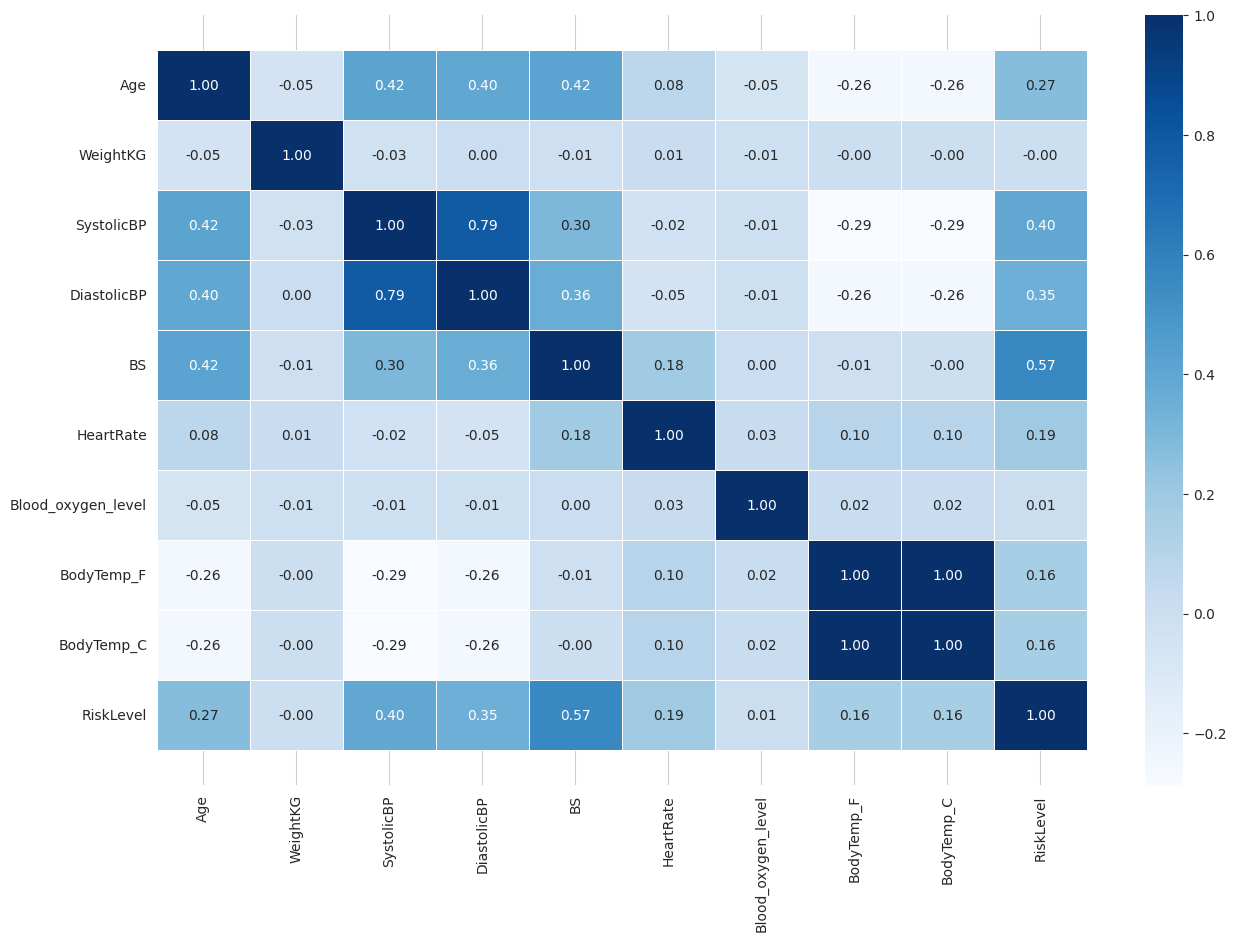

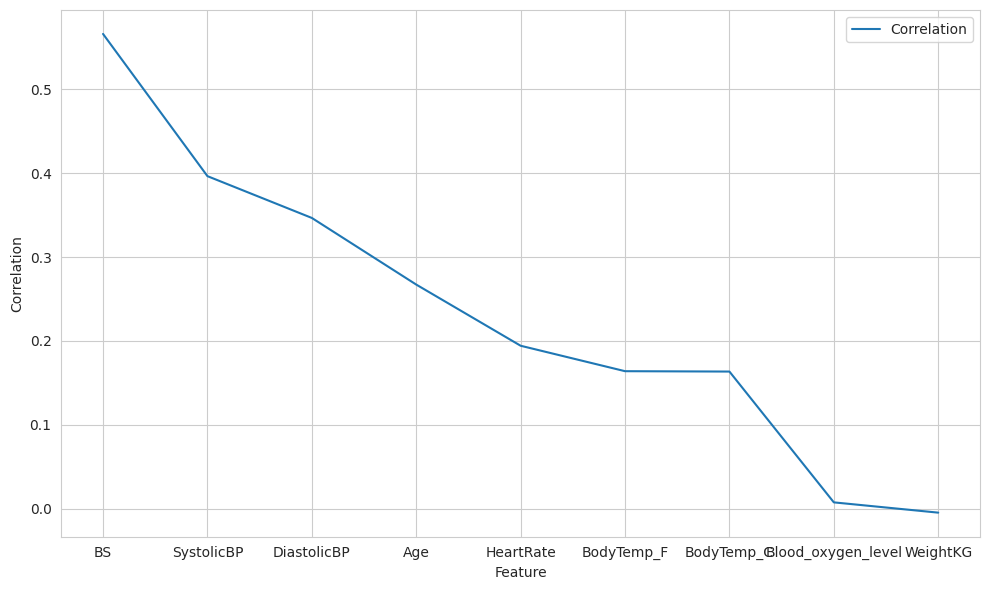

In [ ]:
# Correlation matrix
corr_matrix = df_org.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Blues");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr_matrix["RiskLevel"].sort_values(ascending=False)[1:], label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**
Diastolic and Systolic blood pressures are significantly related, according to the correlation matrix. Blood pressure and blood sugar levels, on the other hand, are connected to age. Furthermore, the danger level is primarily determined by blood sugar levels. Then there's blood pressure and age. Heart rate and body temperature are the least effective risk-level indicators here. Actually, it is expected that age will be more influential on danger level, but the dataset's wide age distribution appears to mitigate this effect.

**After data cleaning**

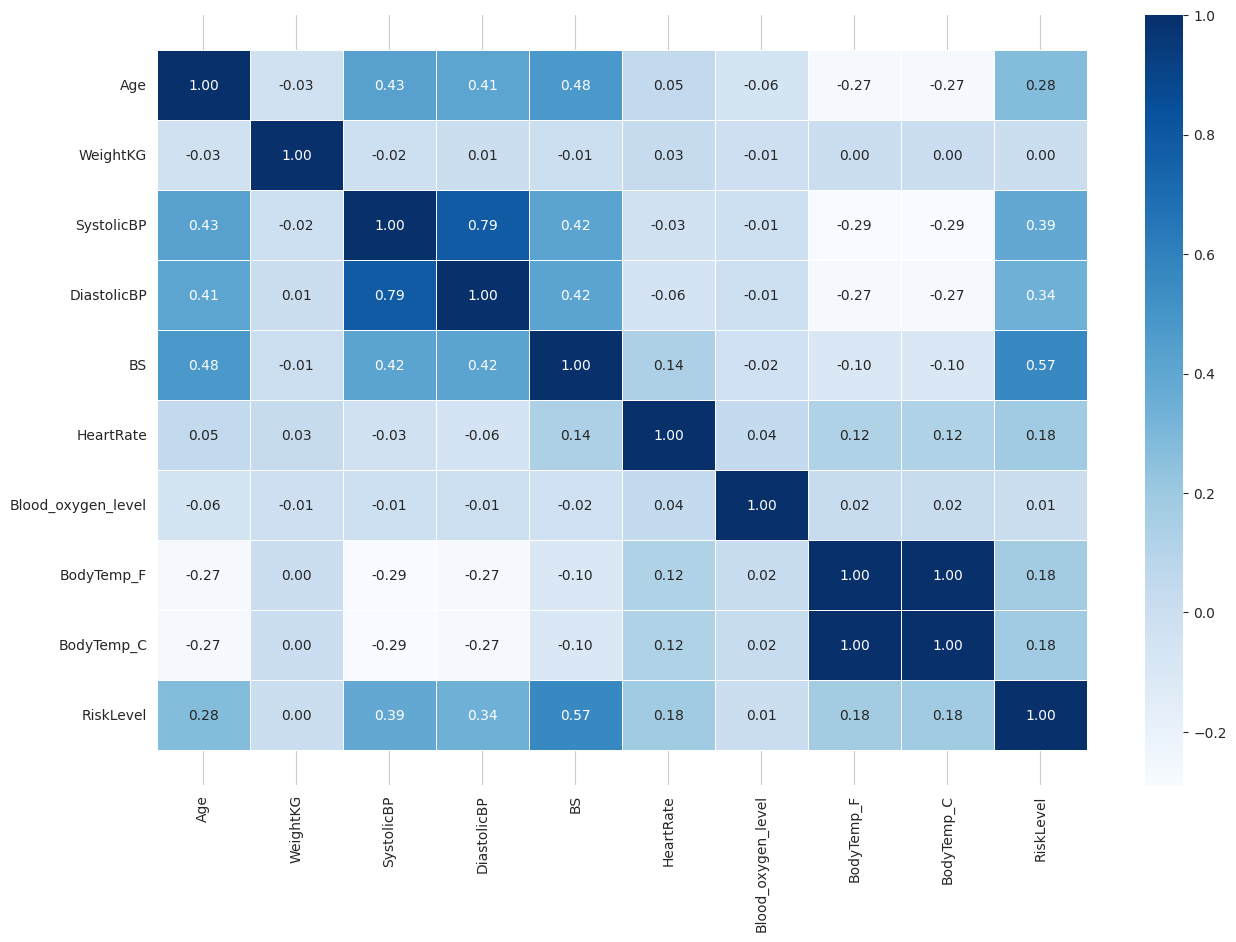

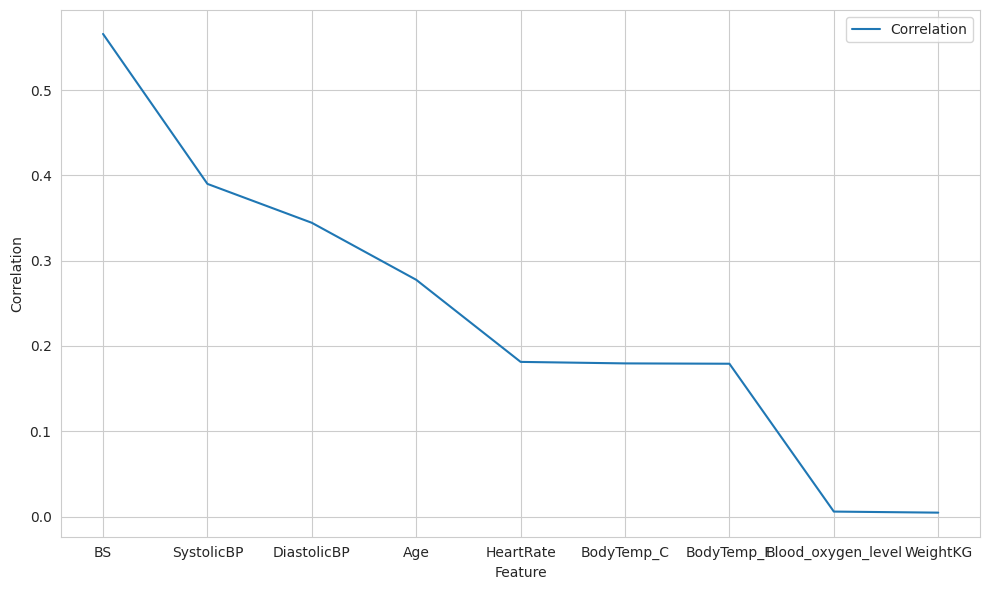

In [ ]:
# Correlation matrix
corr_matrix = maternal_health_df_cleaned.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Blues");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr_matrix["RiskLevel"].sort_values(ascending=False)[1:], label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Chi Square

In [ ]:
# Separate features and target variable

# Drop one temperature measure to avoid redundancy
X = maternal_health_df_cleaned.drop(['RiskLevel','BodyTemp_C'], axis=1)
y = maternal_health_df_cleaned['RiskLevel']

# Apply SelectKBest with the Chi-Squared statistical test
# Since we don't know the optimal number of features, let's select the top 5 for now
k_best_features = SelectKBest(score_func=chi2, k=5)
fit = k_best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenate dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.sort_values(by='Score', ascending=False, inplace=True)  # Sort the dataframe by the Score

# Get the features selected by SelectKBest
chi_square_features = feature_scores.nlargest(5, 'Score')['Feature'].values

feature_scores, chi_square_features


(              Feature       Score
 0                 Age  500.952941
 4                  BS  483.928304
 2          SystolicBP  457.927161
 3         DiastolicBP  354.634528
 5           HeartRate   25.986663
 1            WeightKG    1.051915
 7          BodyTemp_F    0.360810
 6  Blood_oxygen_level    0.007770,
 array(['Age', 'BS', 'SystolicBP', 'DiastolicBP', 'HeartRate'],
       dtype=object))

### 3. Forward Feature Selection

In [ ]:
# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SequentialFeatureSelector object
sfs = SFS(rf_clf,
          k_features=5,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Perform SFS on the training data
sfs = sfs.fit(x_train_proc, y_train_proc)


[2023-11-28 15:55:47] Features: 1/5 -- score: 0.6387499999999999
[2023-11-28 15:56:01] Features: 2/5 -- score: 0.7349999999999999
[2023-11-28 15:56:12] Features: 3/5 -- score: 0.8099999999999999
[2023-11-28 15:56:20] Features: 4/5 -- score: 0.8225000000000001
[2023-11-28 15:56:24] Features: 5/5 -- score: 0.8275

In [ ]:
# Get the selected feature names based on the training set
FFS_features = x_train_proc.columns[list(sfs.k_feature_idx_)]
print('Selected features:', FFS_features)


Selected features: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate'], dtype='object')


### 4. Backward Feature Elimination

In [ ]:
# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SequentialFeatureSelector object
sfs = SFS(rf_clf,
          k_features=5,
          forward=False,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Perform SFS on the training data
sfs = sfs.fit(x_train_proc, y_train_proc)


[2023-11-28 15:56:36] Features: 7/5 -- score: 0.7924999999999999
[2023-11-28 15:56:45] Features: 6/5 -- score: 0.8225
[2023-11-28 15:56:53] Features: 5/5 -- score: 0.8275

In [ ]:
# Get the selected feature names based on the training set
BFE_features = x_train_proc.columns[list(sfs.k_feature_idx_)]
print('Selected features:', BFE_features)

Selected features: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate'], dtype='object')


### 5. Recursive Feature Elimination

In [ ]:
# Apply Recursive Feature Elimination (RFE) with a Support Vector Machine (SVM) classifier
# Specifying the number of features to select for the model (k=5)
num_features_to_select = 5
svm_classifier = SVC(kernel="linear")
rfe = RFE(estimator=svm_classifier, n_features_to_select=num_features_to_select)
X_rfe = rfe.fit_transform(X_proc, y_proc)

In [ ]:
# Get the selected features from RFE
selected_features_rfe = X_proc.columns[rfe.support_].tolist()

# Print the selected features
print("Selected Features (RFE):", selected_features_rfe)

# RFE scores for each feature
feature_rfe_scores = rfe.ranking_

Selected Features (RFE): ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp_F']


In [ ]:
# Combine feature names and their corresponding RFE scores
feature_scores_rfe = pd.DataFrame({'Feature': X_proc.columns, 'RFE Score': feature_rfe_scores})
underlying_model = rfe.estimator_
print("Underlying model:", underlying_model)
# Print or display the selected features and their RFE scores
print("\nRFE Scores for Each Feature:")
print(feature_scores_rfe)

Underlying model: SVC(kernel='linear')

RFE Scores for Each Feature:
              Feature  RFE Score
0                 Age          3
1            WeightKG          4
2          SystolicBP          1
3         DiastolicBP          1
4                  BS          1
5           HeartRate          1
6  Blood_oxygen_level          2
7          BodyTemp_F          1


In [ ]:
RFE_features = selected_features_rfe
RFE_features

['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp_F']

### 6. Random Forest Importance

In [ ]:
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_proc, y_train_proc)

print("Train accuracy:",random_forest.score(x_train_proc,y_train_proc))
print("Test accuracy:",random_forest.score(x_test_proc,y_test_proc))

y_pred = random_forest.predict(x_test_proc)
print(y_pred)
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, random_forest.predict(x_test_proc)))

Train accuracy: 1.0
Test accuracy: 0.7562189054726368
[2 1 2 1 0 2 2 0 1 1 0 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 0 0 1 2 2 0 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 0 0 0 2 1 0 2 0 2 0 2 1 0 0 1 0 1 0 1 1 0 2 0 1 1 0 1 0 2 2 0 1 2 0 1 1
 2 1 2 0 0 1 0 1 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 1 1 2 1 0 1 2 1
 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 0]
CM: [[60 17  0]
 [19 47  4]
 [ 5  4 45]]
Accuracy: 75.62189054726367 %
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        77
           1       0.69      0.67      0.68        70
           2       0.92      0.83      0.87        54

    accuracy                           0.76       201
   macro avg       0.77      0.76      0.77       201
weighted avg       0.76      0.76      0.76       201



In [ ]:
y_pred = random_forest.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Processed Dataset Accuracy: 0.7562189054726368


In [ ]:
feature_importances = random_forest.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_proc.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

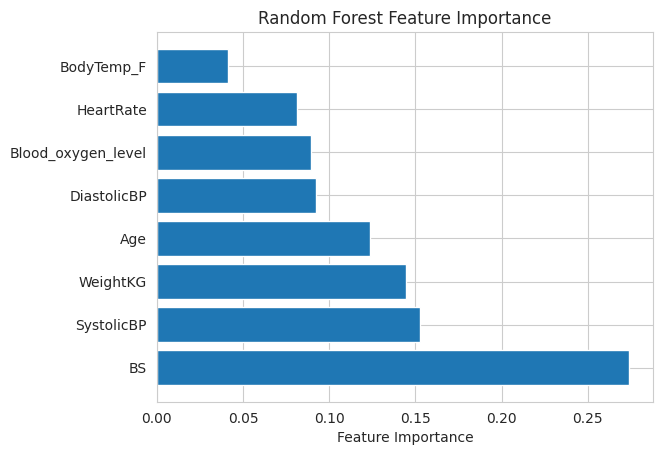

In [ ]:
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# Select top N features
rfi_features = feature_importance_df.head(5)['Feature'].tolist()

# Subset the data with selected features
rfi_sel_features = X_proc[rfi_features]

rfi_sel_features

BS  SystolicBP  WeightKG  Age  DiastolicBP
0     15.0         130      71.6   25           80
1     13.0         140      86.4   35           90
2      8.0          90      57.3   29           70
3      7.0         140      81.0   30           85
4      6.1         120      47.7   35           60
...    ...         ...       ...  ...          ...
1009  15.0         120      61.8   22           60
1010  18.0         120      50.8   55           90
1011  19.0          85      81.2   35           60
1012  18.0         120      58.1   43           90
1013   6.0         120      53.5   32           65

[1001 rows x 5 columns]

### 7. Regularization L1 (LASSO)

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 8, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_proc, y_proc)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [ ]:
names=maternal_health_df_cleaned.drop(["RiskLevel","BodyTemp_C"], axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['Age' 'WeightKG' 'SystolicBP' 'DiastolicBP' 'BS' 'HeartRate'
 'Blood_oxygen_level' 'BodyTemp_F']


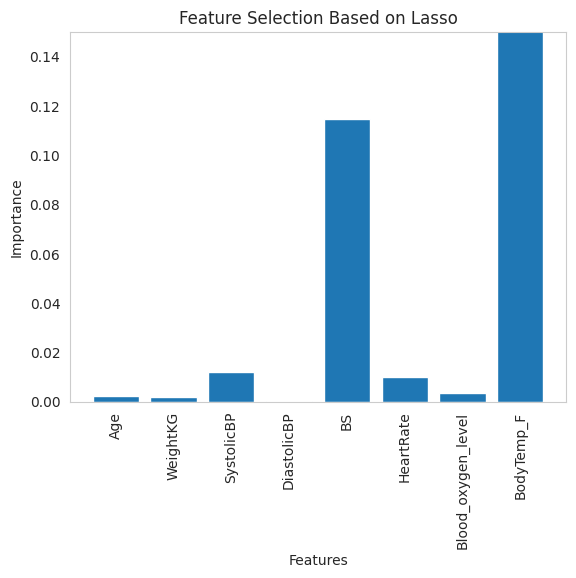

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(x_train_proc, y_train_proc)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [ ]:
# Sort indices based on the absolute values of lasso1 coefficients in descending order
sorted_indices = np.argsort(lasso1_coef)[::-1]

# Sort coefficients and feature names accordingly
sorted_coef = lasso1_coef[sorted_indices]
sorted_names = np.array(names)[sorted_indices]

LASSO_features = sorted_names[:5]

LASSO_features


array(['BodyTemp_F', 'BS', 'SystolicBP', 'HeartRate',
       'Blood_oxygen_level'], dtype=object)

### 8. Regularization L2 (Ridge)

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train_proc_scaled = scaler.fit_transform(x_train_proc)
x_test_proc_scaled = scaler.transform(x_test_proc)

In [ ]:
# Parameters to be tested on GridSearchCV
params = {"alpha": np.arange(0.00001, 8, 500)}

# Number of Folds and adding the random state for replication
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Initializing the Model
ridge = Ridge()

# GridSearchCV with model, params, and folds.
ridge_cv = GridSearchCV(ridge, param_grid=params, cv=kf)
ridge_cv.fit(x_train_proc_scaled, y_train_proc)
print("Best Params {}".format(ridge_cv.best_params_))

# Calling the model with the best parameter
ridge_model = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model.fit(x_train_proc_scaled, y_train_proc)

Best Params {'alpha': 1e-05}


Ridge(alpha=1e-05)

In [ ]:
# Get the coefficients and feature names
ridge_coef = np.abs(ridge_model.coef_)
names = x_train_proc.columns

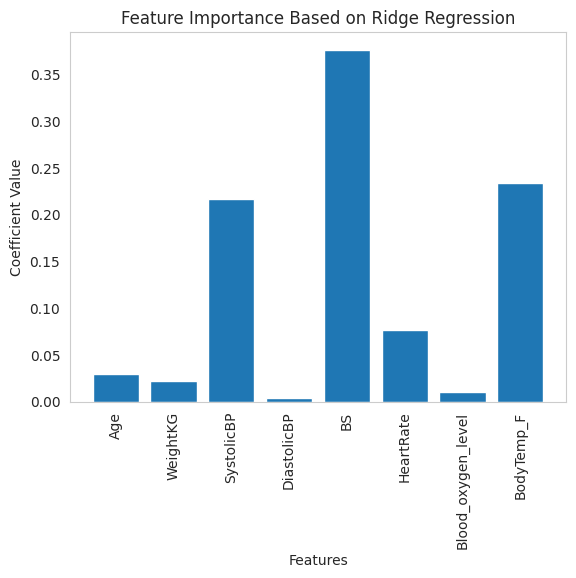

In [ ]:
# Plotting the Column Names and Importance of Columns.
plt.bar(names, ridge_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Importance Based on Ridge Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Subsetting the features which have non-zero coefficients.
feature_subset = np.array(names)[ridge_coef != 0]

In [ ]:
# Get the indices that would sort the coefficients in ascending order
sorted_indices_desc = np.argsort(ridge_coef)[::-1]

# Use the sorted indices to get the names and coefficients in ascending order
feature_subset_sorted = np.array(names)[sorted_indices_desc]
ridge_coef_sorted = ridge_coef[sorted_indices_desc]

print("Selected Feature Columns (Sorted in Descending Order): {}".format(feature_subset_sorted))
print("Corresponding Coefficients (Sorted): {}".format(ridge_coef_sorted))


Selected Feature Columns (Sorted in Descending Order): ['BS' 'BodyTemp_F' 'SystolicBP' 'HeartRate' 'Age' 'WeightKG'
 'Blood_oxygen_level' 'DiastolicBP']
Corresponding Coefficients (Sorted): [0.37647988 0.23367364 0.21649821 0.07644939 0.02919846 0.02253228
 0.01060695 0.00376237]


In [ ]:
Ridge_features = feature_subset[:5]
Ridge_features

array(['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS'], dtype=object)

## Evaluate Models Performance:

Train machine learning models using the selected features and evaluate their performance on the testing set. Measure metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']

In [ ]:
best_accuracies = []

### **Original Dataset**

In [ ]:
f1ScoresTable = []
recallScoresTable = []
accuracyTable = []
precisionTable = []

In [ ]:
# Apply Logistic Regression Algorithm

clf = LogisticRegression()
clf.fit(x_train,y_train)

 # testing model
y_pred = clf.predict(x_test)

print("Train accuracy:",clf.score(x_train,y_train))
print("Test accuracy:",clf.score(x_test,y_test))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

# evaluation
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, clf.predict(x_test)))

Train accuracy: 0.593421052631579
Test accuracy: 0.5039370078740157
F1 Score:  0.49986745203189004
Precision Score:  0.5067971875416398
Recall Score:  0.5039370078740157
accuracy:  0.5039370078740157
CM: [[60 32  3]
 [51 20 12]
 [10 18 48]]
Accuracy: 50.39370078740157 %
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        95
           1       0.29      0.24      0.26        83
           2       0.76      0.63      0.69        76

    accuracy                           0.50       254
   macro avg       0.51      0.50      0.50       254
weighted avg       0.51      0.50      0.50       254



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print("Train accuracy:",svm.score(x_train,y_train))
print("Test accuracy:",svm.score(x_test,y_test))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(x_test)))

Train accuracy: 0.9802631578947368
Test accuracy: 0.4763779527559055
F1 Score:  0.41341970447823484
Precision Score:  0.6262185976752905
Recall Score:  0.4763779527559055
accuracy:  0.4763779527559055
[0 0 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 2 0 2 0 0 0 1 1 0
 0 1 0 0 0 1 0 2 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 2 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0]
CM: [[88  7  0]
 [56 24  3]
 [66  1  9]]
Accuracy: 47.63779527559055 %
              precision    recall  f1-score   support

           0       0.42      0.93      0.58        95
           1       0.75      0.29      0.42        83
           2       0.75      0.12      0.20      

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

print("Train accuracy:",decision_tree.score(x_train,y_train))
print("Test accuracy:",decision_tree.score(x_test,y_test))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(x_test) ))

Train accuracy: 1.0
Test accuracy: 0.7283464566929134
F1 Score:  0.7268733030000479
Precision Score:  0.7258567560384066
Recall Score:  0.7283464566929134
accuracy:  0.7283464566929134
[0 1 1 1 2 2 1 2 2 0 0 1 2 1 0 2 2 1 0 0 2 0 0 0 2 2 2 1 1 2 1 0 1 0 2 0 0
 2 2 0 2 0 1 1 1 0 1 0 0 0 2 1 0 2 0 0 0 2 0 0 1 0 0 1 2 0 0 1 0 2 0 1 0 1
 2 1 1 1 0 1 2 1 0 0 0 2 1 0 2 2 0 0 0 0 1 2 2 1 0 0 0 1 1 0 2 0 0 0 1 1 2
 0 2 0 1 2 1 1 2 1 1 0 2 0 2 2 2 1 0 1 0 1 1 2 0 2 2 2 2 2 2 2 1 0 2 2 1 1
 0 2 1 2 0 2 0 1 1 2 0 1 0 0 1 2 0 0 2 0 1 1 0 1 1 2 2 1 0 2 2 2 1 2 1 2 0
 0 2 0 1 0 0 1 1 2 2 2 1 1 0 1 2 2 2 0 0 0 1 1 1 0 1 2 2 0 0 1 0 1 2 2 1 1
 0 0 0 1 1 2 2 2 0 1 0 1 0 2 0 2 0 0 0 1 1 0 0 2 1 2 2 0 1 0 0 0]
CM: [[68 21  6]
 [25 51  7]
 [ 3  7 66]]
Accuracy: 72.83464566929135 %
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        95
           1       0.65      0.61      0.63        83
           2       0.84      0.87      0.85        76

    accura

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

print("Train accuracy:",random_forest.score(x_train,y_train))
print("Test accuracy:",random_forest.score(x_test,y_test))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(x_test)))

Train accuracy: 1.0
Test accuracy: 0.7795275590551181
F1 Score:  0.7757327555477965
Precision Score:  0.7809994879371421
Recall Score:  0.7795275590551181
accuracy:  0.7795275590551181
[0 1 0 1 2 2 2 2 2 0 0 1 2 1 0 2 2 1 0 0 2 0 0 0 2 2 2 1 1 2 0 0 1 0 2 0 0
 2 2 0 2 0 1 1 1 0 0 0 0 0 2 0 0 1 0 0 0 2 0 0 0 0 0 1 2 0 0 2 0 2 0 1 0 2
 2 1 1 0 0 1 2 2 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 2 0 2 0 0 0 1 1 2
 0 2 0 1 2 1 0 2 1 0 0 2 0 2 1 2 1 1 1 0 0 1 2 0 1 2 2 2 2 2 2 1 0 2 2 1 1
 0 2 1 2 1 2 0 0 1 1 0 1 0 0 1 2 0 1 2 0 0 1 0 0 1 2 2 1 0 2 2 2 1 2 1 2 0
 0 2 0 1 0 0 1 1 2 2 0 1 0 0 1 2 2 2 0 0 0 1 1 1 0 2 2 2 0 0 1 0 0 2 2 0 1
 1 0 0 0 1 2 1 2 0 1 1 1 0 2 0 2 1 0 0 1 0 0 1 2 1 2 0 0 1 0 0 0]
CM: [[82 12  1]
 [25 50  8]
 [ 5  5 66]]
Accuracy: 77.95275590551181 %
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        95
           1       0.75      0.60      0.67        83
           2       0.88      0.87      0.87        76

    accura

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train, y_train)

y_pred = xgb_clf.predict(x_test)

print("Train accuracy:",xgb_clf.score(x_train,y_train))
print("Test accuracy:",xgb_clf.score(x_test,y_test))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, xgb_clf.predict(x_test)))

Train accuracy: 1.0
Test accuracy: 0.7559055118110236
F1 Score:  0.7525196573290419
Precision Score:  0.7576497923766992
Recall Score:  0.7559055118110236
accuracy:  0.7559055118110236
[0 1 0 1 2 2 1 2 2 1 0 1 2 1 0 2 2 1 0 0 2 0 0 0 2 2 2 0 1 2 0 0 1 0 2 0 0
 2 2 0 2 0 1 1 1 0 1 0 0 1 2 0 0 1 0 0 1 2 0 0 0 0 1 1 2 0 0 2 0 2 0 0 0 2
 2 1 1 0 0 2 2 1 0 0 0 1 0 1 0 2 0 0 0 0 0 2 2 0 0 0 0 1 2 0 2 0 0 1 1 1 2
 0 2 0 1 2 1 0 0 1 0 0 2 0 2 2 2 0 1 1 0 0 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1
 0 2 1 2 0 2 0 1 0 1 0 1 0 0 1 2 0 1 2 0 0 1 0 0 1 2 2 1 0 2 2 2 1 2 0 2 0
 0 2 0 1 0 0 2 1 2 2 0 1 0 0 1 2 2 2 0 0 0 1 1 1 0 2 2 2 1 0 1 1 0 2 2 0 1
 0 0 0 0 1 2 0 2 0 1 1 1 0 2 0 2 1 0 0 1 0 0 1 2 1 2 0 0 1 0 0 0]
CM: [[77 17  1]
 [30 47  6]
 [ 5  3 68]]
Accuracy: 75.59055118110236 %
              precision    recall  f1-score   support

           0       0.69      0.81      0.74        95
           1       0.70      0.57      0.63        83
           2       0.91      0.89      0.90        76

    accura

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTable)

# Get the name of the best model
best_model = models[best_model_index]

best_accuracies.append(np.max(accuracyTable))
# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTable))

Best Model: Random Forest
Best Accuracy: 0.7795275590551181


### **Chi Squared Feature Selection**

In [ ]:
# Processed Dataset
X_chi = maternal_health_df_cleaned[chi_square_features]
y_chi = maternal_health_df_cleaned.RiskLevel
x_train_chi, x_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableChi = []
recallScoresTableChi = []
accuracyTableChi = []
precisionTableChi = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_chi,y_train_chi)

 # testing model
y_pred = clf.predict(x_test_chi)

print("Train accuracy:",clf.score(x_train_chi,y_train_chi))
print("Test accuracy:",clf.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, clf.predict(x_test_chi)))

Train accuracy: 0.56375
Test accuracy: 0.5174129353233831
F1 Score:  0.5093974192182533
Precision Score:  0.533150065488374
Recall Score:  0.5174129353233831
accuracy:  0.5174129353233831
CM: [[54 20  3]
 [35 26  9]
 [22  8 24]]
Accuracy: 51.741293532338304 %
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        77
           1       0.48      0.37      0.42        70
           2       0.67      0.44      0.53        54

    accuracy                           0.52       201
   macro avg       0.54      0.51      0.51       201
weighted avg       0.53      0.52      0.51       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_chi, y_train_chi)

y_pred = svm.predict(x_test_chi)

print("Train accuracy:",svm.score(x_train_chi,y_train_chi))
print("Test accuracy:",svm.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, svm.predict(x_test_chi)))

Train accuracy: 0.83625
Test accuracy: 0.7313432835820896
F1 Score:  0.731227060387257
Precision Score:  0.7379131509983206
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[0 1 2 1 0 0 2 2 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 0 1 1 1 2 1
 0 1 1 0 0 1 2 1 1 2 0 1 0 0 0 0 0 0 2 0 2 0 1 0 2 1 1 0 1 1 0 2 2 1 0 0 1
 1 1 2 0 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 2 0 1 0
 2 1 2 0 0 1 0 1 0 2 1 2 1 0 2 0 0 0 1 2 1 0 0 1 1 0 1 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 1 0 0 0]
CM: [[63 14  0]
 [19 45  6]
 [ 7  8 39]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.67      0.64      0.66        70
           2       0.87      0.72      0.79        54

    accuracy                           0.73       201
   macro avg       0.75      0.73      0.73       201
weight

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_chi, y_train_chi)

y_pred = decision_tree.predict(x_test_chi)

print("Train accuracy:",decision_tree.score(x_train_chi,y_train_chi))
print("Test accuracy:",decision_tree.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, decision_tree.predict(x_test_chi) ))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8218358755672189
Precision Score:  0.8234051338793542
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 0 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 0 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [11 55  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.75      0.79      0.77        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.82      0.83       201
weighte

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_chi, y_train_chi)

y_pred = random_forest.predict(x_test_chi)

print("Train accuracy:",random_forest.score(x_train_chi,y_train_chi))
print("Test accuracy:",random_forest.score(x_test_chi,y_test_chi))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, random_forest.predict(x_test_chi)))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8221653636579009
Precision Score:  0.825499270915221
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[61 16  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.74      0.81      0.78        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.83      0.83       201
weighted

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_chi, y_train_chi)

y_pred = xgb_clf.predict(x_test_chi)

print("Train accuracy:",xgb_clf.score(x_train_chi,y_train_chi))
print("Test accuracy:",xgb_clf.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, xgb_clf.predict(x_test_chi)))

Train accuracy: 0.935
Test accuracy: 0.8258706467661692
F1 Score:  0.826831489428667
Precision Score:  0.8289454687347576
Recall Score:  0.8258706467661692
accuracy:  0.8258706467661692
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[62 15  0]
 [ 9 57  4]
 [ 4  3 47]]
Accuracy: 82.58706467661692 %
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.76      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.83       201
weighted

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableChi)

# Get the name of the best model
best_model = models[best_model_index]

best_accuracies.append(np.max(accuracyTableChi))
# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableChi))

Best Model: XGBoost
Best Accuracy: 0.8258706467661692


###**Recursive Feature Elimination**

In [ ]:
# Processed Dataset
x_rfe = maternal_health_df_cleaned[RFE_features]
y_rfe = maternal_health_df_cleaned.RiskLevel
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(x_rfe, y_rfe, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableRFE = []
recallScoresTableRFE = []
accuracyTableRFE = []
precisionTableRFE = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_rfe,y_train_rfe)

 # testing model
y_pred = clf.predict(x_test_rfe)

print("Train accuracy:",clf.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",clf.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, clf.predict(x_test_rfe)))

Train accuracy: 0.5825
Test accuracy: 0.5323383084577115
F1 Score:  0.5230464937735039
Precision Score:  0.5402900029765701
Recall Score:  0.5323383084577115
accuracy:  0.5323383084577115
CM: [[56 21  0]
 [38 22 10]
 [14 11 29]]
Accuracy: 53.233830845771145 %
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        77
           1       0.41      0.31      0.35        70
           2       0.74      0.54      0.62        54

    accuracy                           0.53       201
   macro avg       0.56      0.53      0.53       201
weighted avg       0.54      0.53      0.52       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_rfe, y_train_rfe)
y_pred = svm.predict(x_test_rfe)

print("Train accuracy:",svm.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",svm.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, svm.predict(x_test_rfe)))

Train accuracy: 0.785
Test accuracy: 0.6666666666666666
F1 Score:  0.6593095809258896
Precision Score:  0.6675544112322485
Recall Score:  0.6666666666666666
accuracy:  0.6666666666666666
[0 1 2 0 0 0 2 0 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 2 1 1 1 0 1
 0 1 1 0 1 2 2 0 0 2 1 2 1 1 0 0 0 0 0 0 2 0 0 2 2 0 1 0 0 0 0 2 2 1 0 0 2
 1 1 2 2 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 0 0 2 1 0 0 0 1 0 0 0 0
 0 0 0 0 2 0 0 2 0 2 0 2 1 0 0 0 0 0 0 1 1 0 2 0 1 0 1 1 0 2 2 0 1 2 0 1 0
 1 1 2 0 0 1 0 2 1 2 1 2 1 0 2 0 1 0 1 2 1 0 0 1 1 0 1 0 0 1 1 2 1 0 1 2 0
 0 0 0 0 0 0 1 0 0 0 1 2 1 0 0 0]
CM: [[62 14  1]
 [29 32  9]
 [ 7  7 40]]
Accuracy: 66.66666666666666 %
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        77
           1       0.60      0.46      0.52        70
           2       0.80      0.74      0.77        54

    accuracy                           0.67       201
   macro avg       0.68      0.67      0.67       201
weighte

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_rfe, y_train_rfe)

y_pred = decision_tree.predict(x_test_rfe)

print("Train accuracy:",decision_tree.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",decision_tree.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, decision_tree.predict(x_test_rfe) ))

Train accuracy: 0.9075
Test accuracy: 0.7810945273631841
F1 Score:  0.7823871463691232
Precision Score:  0.7863068191005967
Recall Score:  0.7810945273631841
accuracy:  0.7810945273631841
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 0 1 1 0 1 2 2 0 1 2 0 2 0 1 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 1 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 2 0 0 2 0 2 0 2 1 0 1 1 0 0 0 1 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 1 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[57 20  0]
 [10 54  6]
 [ 4  4 46]]
Accuracy: 78.1094527363184 %
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        77
           1       0.69      0.77      0.73        70
           2       0.88      0.85      0.87        54

    accuracy                           0.78       201
   macro avg       0.79      0.79      0.79       201
weighte

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_rfe, y_train_rfe)

y_pred = random_forest.predict(x_test_rfe)

print("Train accuracy:",random_forest.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",random_forest.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, random_forest.predict(x_test_rfe)))

Train accuracy: 0.9075
Test accuracy: 0.7910447761194029
F1 Score:  0.7915478164731895
Precision Score:  0.7928756808331536
Recall Score:  0.7910447761194029
accuracy:  0.7910447761194029
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 0 1 1 0 1 2 2 0 1 2 0 2 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 2 0 2 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 2 0 0 2 0 2 0 2 1 0 1 1 0 0 0 1 1 0 2 1 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[59 18  0]
 [10 53  7]
 [ 4  3 47]]
Accuracy: 79.1044776119403 %
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        77
           1       0.72      0.76      0.74        70
           2       0.87      0.87      0.87        54

    accuracy                           0.79       201
   macro avg       0.80      0.80      0.80       201
weighte

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_rfe, y_train_rfe)

y_pred = xgb_clf.predict(x_test_rfe)

print("Train accuracy:",xgb_clf.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",xgb_clf.score(x_test_rfe,y_test_rfe))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

y_pred = random_forest.predict(x_test_rfe)
print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, xgb_clf.predict(x_test_rfe)))

Train accuracy: 0.90625
Test accuracy: 0.7960199004975125
F1 Score:  0.7947177407265501
Precision Score:  0.7944897763927614
Recall Score:  0.7960199004975125
accuracy:  0.7960199004975125
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 0 1 1 0 1 2 2 0 1 2 0 2 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 2 0 2 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 2 0 0 2 0 2 0 2 1 0 1 1 0 0 0 1 1 0 2 1 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[59 18  0]
 [10 53  7]
 [ 4  3 47]]
Accuracy: 79.1044776119403 %
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        77
           1       0.75      0.70      0.73        70
           2       0.86      0.89      0.87        54

    accuracy                           0.80       201
   macro avg       0.80      0.80      0.80       201
weight

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableRFE)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableRFE))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableRFE))

Best Model: XGBoost
Best Accuracy: 0.7960199004975125


###**Random Forest Importance**

In [ ]:
# Processed Dataset
x_rfi = maternal_health_df_cleaned[rfi_features]
y_rfi = maternal_health_df_cleaned.RiskLevel
x_train_rfi, x_test_rfi, y_train_rfi, y_test_rfi = train_test_split(x_rfi, y_rfi, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableRfi = []
recallScoresTableRfi = []
accuracyTableRfi = []
precisionTableRfi = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_rfi,y_train_rfi)

 # testing model
y_pred = clf.predict(x_test_rfi)

print("Train accuracy:",clf.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",clf.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, clf.predict(x_test_rfi)))

Train accuracy: 0.58875
Test accuracy: 0.5124378109452736
F1 Score:  0.4980260272505273
Precision Score:  0.5139951223905525
Recall Score:  0.5124378109452736
accuracy:  0.5124378109452736
CM: [[53 22  2]
 [37 19 14]
 [21  2 31]]
Accuracy: 51.243781094527364 %
              precision    recall  f1-score   support

           0       0.48      0.69      0.56        77
           1       0.44      0.27      0.34        70
           2       0.66      0.57      0.61        54

    accuracy                           0.51       201
   macro avg       0.53      0.51      0.50       201
weighted avg       0.51      0.51      0.50       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_rfi, y_train_rfi)
y_pred = svm.predict(x_test_rfi)

print("Train accuracy:",svm.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",svm.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, svm.predict(x_test_rfi)))

Train accuracy: 0.935
Test accuracy: 0.582089552238806
F1 Score:  0.5700737702120358
Precision Score:  0.6059549512979053
Recall Score:  0.582089552238806
accuracy:  0.582089552238806
[2 1 2 1 0 0 0 0 1 0 0 0 2 1 0 0 0 1 2 2 0 2 0 1 2 0 2 0 0 2 0 0 1 1 1 2 0
 1 1 0 0 0 2 2 1 2 2 1 1 0 0 0 0 1 0 2 0 2 0 1 0 2 0 1 0 0 0 0 2 2 1 0 1 1
 2 0 2 1 0 2 0 0 0 0 2 0 2 0 2 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 0 1 0 0 1 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 1 2 0 0 0
 2 0 2 0 0 0 0 1 1 2 0 2 0 0 2 0 0 0 0 2 1 0 0 0 1 0 1 1 0 1 0 2 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 2 2 0 0 0]
CM: [[61 15  1]
 [41 23  6]
 [16  5 33]]
Accuracy: 58.2089552238806 %
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        77
           1       0.53      0.33      0.41        70
           2       0.82      0.61      0.70        54

    accuracy                           0.58       201
   macro avg       0.63      0.58      0.58       201
weighted av

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_rfi, y_train_rfi)

y_pred = decision_tree.predict(x_test_rfi)

print("Train accuracy:",decision_tree.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",decision_tree.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, decision_tree.predict(x_test_rfi) ))

Train accuracy: 0.99875
Test accuracy: 0.736318407960199
F1 Score:  0.7379129991070289
Precision Score:  0.740524405002017
Recall Score:  0.736318407960199
accuracy:  0.736318407960199
[2 1 2 1 0 2 2 0 1 1 0 2 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 1 2 0 1 1 1 1 0 1
 1 1 1 0 1 2 2 1 1 2 0 1 0 0 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 1 1 2 1 1 2 0 1 0 1 2 0 2 1 2 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 2 0 0 2 1 2 1 2 1 0 1 1 0 0 1 0 1 0 2 0 1 1 0 0 0 1 2 1 0 2 1 1 1
 2 1 2 0 1 1 1 1 1 2 1 2 0 0 2 0 0 2 0 2 1 0 0 1 2 0 2 1 0 1 2 2 1 0 1 2 0
 0 1 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[57 19  1]
 [16 48  6]
 [ 4  7 43]]
Accuracy: 73.6318407960199 %
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        77
           1       0.65      0.69      0.67        70
           2       0.86      0.80      0.83        54

    accuracy                           0.74       201
   macro avg       0.75      0.74      0.74       201
weighted a

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_rfi, y_train_rfi)

y_pred = random_forest.predict(x_test_rfi)

print("Train accuracy:",random_forest.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",random_forest.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, random_forest.predict(x_test_rfi)))

Train accuracy: 0.99875
Test accuracy: 0.7412935323383084
F1 Score:  0.7425908125292978
Precision Score:  0.7474420676900123
Recall Score:  0.7412935323383084
accuracy:  0.7412935323383084
[2 1 2 1 0 2 2 0 1 1 0 1 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 2 2 0 0 1 1 1 0 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 0 2 1 2 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 2 0 0 2 1 2 1 2 1 0 0 1 0 0 0 0 1 0 2 0 1 1 0 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 1 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[60 17  0]
 [21 45  4]
 [ 5  5 44]]
Accuracy: 74.12935323383084 %
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        77
           1       0.67      0.64      0.66        70
           2       0.92      0.81      0.86        54

    accuracy                           0.74       201
   macro avg       0.76      0.75      0.75       201
weigh

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_rfi, y_train_rfi)

y_pred = xgb_clf.predict(x_test_rfi)

print("Train accuracy:",xgb_clf.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",xgb_clf.score(x_test_rfi,y_test_rfi))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, xgb_clf.predict(x_test_rfi)))

Train accuracy: 0.9975
Test accuracy: 0.7064676616915423
F1 Score:  0.7080914047336743
Precision Score:  0.7113090594810914
Recall Score:  0.7064676616915423
accuracy:  0.7064676616915423
[2 1 2 1 0 2 2 0 1 1 2 1 0 1 0 0 2 1 2 2 0 2 1 0 2 2 2 0 2 2 0 0 1 1 1 1 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 0 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 1 2 1 0 2 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 2 1 0 2 1 2 0 2 1 0 1 1 0 0 0 0 1 0 2 0 1 1 0 1 0 1 2 0 1 2 0 1 0
 2 0 2 0 1 2 0 1 1 2 1 2 0 0 2 0 0 0 0 2 1 0 0 0 2 0 1 1 0 1 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 1 2 0 1 0 0]
CM: [[56 21  0]
 [21 43  6]
 [ 5  6 43]]
Accuracy: 70.64676616915423 %
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        77
           1       0.61      0.61      0.61        70
           2       0.88      0.80      0.83        54

    accuracy                           0.71       201
   macro avg       0.72      0.71      0.72       201
weight

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableRfi)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableRfi))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableRfi))

Best Model: Random Forest
Best Accuracy: 0.7412935323383084


###**Forward Feature Selection**

In [ ]:
# Processed Dataset
x_ffs = maternal_health_df_cleaned[FFS_features]
y_ffs = maternal_health_df_cleaned.RiskLevel
x_train_ffs, x_test_ffs, y_train_ffs, y_test_ffs = train_test_split(x_ffs, y_ffs, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableFfs = []
recallScoresTableFfs = []
accuracyTableFfs = []
precisionTableFfs = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_ffs,y_train_ffs)

 # testing model
y_pred = clf.predict(x_test_ffs)

print("Train accuracy:",clf.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",clf.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, clf.predict(x_test_ffs)))

Train accuracy: 0.56375
Test accuracy: 0.5174129353233831
F1 Score:  0.5093974192182533
Precision Score:  0.533150065488374
Recall Score:  0.5174129353233831
accuracy:  0.5174129353233831
CM: [[54 20  3]
 [35 26  9]
 [22  8 24]]
Accuracy: 51.741293532338304 %
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        77
           1       0.48      0.37      0.42        70
           2       0.67      0.44      0.53        54

    accuracy                           0.52       201
   macro avg       0.54      0.51      0.51       201
weighted avg       0.53      0.52      0.51       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_ffs, y_train_ffs)

y_pred = svm.predict(x_test_ffs)

print("Train accuracy:",svm.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",svm.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

y_pred = svm.predict(x_test_ffs)
print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, svm.predict(x_test_ffs)))

Train accuracy: 0.83625
Test accuracy: 0.7313432835820896
F1 Score:  0.731227060387257
Precision Score:  0.7379131509983206
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[0 1 2 1 0 0 2 2 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 0 1 1 1 2 1
 0 1 1 0 0 1 2 1 1 2 0 1 0 0 0 0 0 0 2 0 2 0 1 0 2 1 1 0 1 1 0 2 2 1 0 0 1
 1 1 2 0 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 2 0 1 0
 2 1 2 0 0 1 0 1 0 2 1 2 1 0 2 0 0 0 1 2 1 0 0 1 1 0 1 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 1 0 0 0]
CM: [[63 14  0]
 [19 45  6]
 [ 7  8 39]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.67      0.64      0.66        70
           2       0.87      0.72      0.79        54

    accuracy                           0.73       201
   macro avg       0.75      0.73      0.73       201
weight

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_ffs, y_train_ffs)

y_pred = decision_tree.predict(x_test_ffs)

print("Train accuracy:",decision_tree.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",decision_tree.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, decision_tree.predict(x_test_ffs) ))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.8318720759696462
Precision Score:  0.8340532630962832
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.76      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighte

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_ffs, y_train_ffs)

y_pred = random_forest.predict(x_test_ffs)

print("Train accuracy:",random_forest.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",random_forest.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, random_forest.predict(x_test_ffs)))

Train accuracy: 0.935
Test accuracy: 0.8159203980099502
F1 Score:  0.8172895466694927
Precision Score:  0.821319496034158
Recall Score:  0.8159203980099502
accuracy:  0.8159203980099502
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 1 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[60 17  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 81.59203980099502 %
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.73      0.81      0.77        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.82      0.82       201
weighted

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_ffs, y_train_ffs)

y_pred = xgb_clf.predict(x_test_ffs)

print("Train accuracy:",xgb_clf.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",xgb_clf.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, xgb_clf.predict(x_test_ffs)))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.831697952812966
Precision Score:  0.8333958814412582
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 4  3 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.77      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighted

In [ ]:
best_class_report = classification_report(y_test_ffs, xgb_clf.predict(x_test_ffs), output_dict=True)
best_acc = accuracy_score(y_test_ffs, y_pred)

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableFfs)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableFfs))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableFfs))

Best Model: DecisionTree
Best Accuracy: 0.8308457711442786


###**Backward Feature Elimination**

In [ ]:
# Processed Dataset
x_bfe = maternal_health_df_cleaned[BFE_features]
y_bfe = maternal_health_df_cleaned.RiskLevel
x_train_bfe, x_test_bfe, y_train_bfe, y_test_bfe = train_test_split(x_bfe, y_bfe, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableBfe = []
recallScoresTableBfe = []
accuracyTableBfe = []
precisionTableBfe = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm

clf = LogisticRegression()
clf.fit(x_train_bfe,y_train_bfe)

 # testing model
y_pred = clf.predict(x_test_bfe)

print("Train accuracy:",clf.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",clf.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, clf.predict(x_test_bfe)))

Train accuracy: 0.56375
Test accuracy: 0.5174129353233831
F1 Score:  0.5093974192182533
Precision Score:  0.533150065488374
Recall Score:  0.5174129353233831
accuracy:  0.5174129353233831
CM: [[54 20  3]
 [35 26  9]
 [22  8 24]]
Accuracy: 51.741293532338304 %
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        77
           1       0.48      0.37      0.42        70
           2       0.67      0.44      0.53        54

    accuracy                           0.52       201
   macro avg       0.54      0.51      0.51       201
weighted avg       0.53      0.52      0.51       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_bfe, y_train_bfe)

y_pred = svm.predict(x_test_bfe)
print("Train accuracy:",svm.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",svm.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, svm.predict(x_test_bfe)))

Train accuracy: 0.83625
Test accuracy: 0.7313432835820896
F1 Score:  0.731227060387257
Precision Score:  0.7379131509983206
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[0 1 2 1 0 0 2 2 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 0 1 1 1 2 1
 0 1 1 0 0 1 2 1 1 2 0 1 0 0 0 0 0 0 2 0 2 0 1 0 2 1 1 0 1 1 0 2 2 1 0 0 1
 1 1 2 0 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 2 0 1 0
 2 1 2 0 0 1 0 1 0 2 1 2 1 0 2 0 0 0 1 2 1 0 0 1 1 0 1 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 1 0 0 0]
CM: [[63 14  0]
 [19 45  6]
 [ 7  8 39]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.67      0.64      0.66        70
           2       0.87      0.72      0.79        54

    accuracy                           0.73       201
   macro avg       0.75      0.73      0.73       201
weight

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_bfe, y_train_bfe)

y_pred = decision_tree.predict(x_test_bfe)

print("Train accuracy:",decision_tree.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",decision_tree.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, decision_tree.predict(x_test_bfe) ))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8218358755672189
Precision Score:  0.8234051338793542
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 0 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 0 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [11 55  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.75      0.79      0.77        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.82      0.83       201
weighte

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_bfe, y_train_bfe)

y_pred = random_forest.predict(x_test_bfe)

print("Train accuracy:",random_forest.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",random_forest.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, random_forest.predict(x_test_bfe)))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8221653636579009
Precision Score:  0.825499270915221
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[61 16  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.74      0.81      0.78        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.83      0.83       201
weighted

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_bfe, y_train_bfe)

y_pred = xgb_clf.predict(x_test_bfe)

print("Train accuracy:",xgb_clf.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",xgb_clf.score(x_test_bfe,y_test_bfe))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, xgb_clf.predict(x_test_bfe)))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.831697952812966
Precision Score:  0.8333958814412582
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 4  3 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.77      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighted

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableBfe)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableBfe))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableBfe))

Best Model: XGBoost
Best Accuracy: 0.8308457711442786


### **Regularization L1 (LASSO)**

In [ ]:
# Processed Dataset
X_LASSO = maternal_health_df_cleaned[LASSO_features]
y_LASSO = maternal_health_df_cleaned.RiskLevel
x_train_LASSO, x_test_LASSO, y_train_LASSO, y_test_LASSO = train_test_split(X_LASSO, y_LASSO, test_size=0.2, random_state=1)

In [ ]:
#StandardScaler

ss = StandardScaler()

x_train_LASSO_scaled = ss.fit_transform(x_train_LASSO)

x_test_LASSO_scaled= ss.transform(x_test_LASSO)

In [ ]:
f1ScoresTableLASSO = []
recallScoresTableLASSO = []
accuracyTableLASSO = []
precisionTableLASSO = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_LASSO_scaled,y_train_LASSO)

 # testing model
y_pred = clf.predict(x_test_LASSO_scaled)

print("Train accuracy:",clf.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",clf.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, clf.predict(x_test_LASSO_scaled)))

Train accuracy: 0.65875
Test accuracy: 0.582089552238806
F1 Score:  0.5633443581531332
Precision Score:  0.5720606171157154
Recall Score:  0.582089552238806
accuracy:  0.582089552238806
CM: [[67 10  0]
 [37 22 11]
 [ 3 23 28]]
Accuracy: 58.2089552238806 %
              precision    recall  f1-score   support

           0       0.63      0.87      0.73        77
           1       0.40      0.31      0.35        70
           2       0.72      0.52      0.60        54

    accuracy                           0.58       201
   macro avg       0.58      0.57      0.56       201
weighted avg       0.57      0.58      0.56       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_LASSO_scaled, y_train_LASSO)
y_pred = svm.predict(x_test_LASSO_scaled)

print("Train accuracy:",svm.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",svm.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, svm.predict(x_test_LASSO_scaled)))

Train accuracy: 0.68875
Test accuracy: 0.6119402985074627
F1 Score:  0.5874446204848223
Precision Score:  0.6014647896553454
Recall Score:  0.6119402985074627
accuracy:  0.6119402985074627
[0 0 2 0 0 0 2 0 2 0 2 1 1 0 0 0 2 1 2 2 0 2 1 1 2 2 2 0 2 2 0 1 0 1 1 0 0
 0 1 0 0 0 2 2 0 0 1 0 2 1 0 0 0 0 0 1 0 2 0 0 2 2 1 1 2 0 0 0 2 2 1 0 0 2
 1 1 2 1 0 2 0 2 1 0 2 1 2 0 2 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 2 0 1 2 0 2 0 1 0 0 0 0 0 0 0 1 2 0 1 1 0 0 0 1 0 2 2 0 0 0 0 1 0
 1 1 2 0 0 2 0 2 0 2 0 2 0 0 2 0 0 0 0 2 1 0 0 0 1 0 1 0 0 1 1 2 0 0 1 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1]
CM: [[68  9  0]
 [40 20 10]
 [ 5 14 35]]
Accuracy: 61.19402985074627 %
              precision    recall  f1-score   support

           0       0.60      0.88      0.72        77
           1       0.47      0.29      0.35        70
           2       0.78      0.65      0.71        54

    accuracy                           0.61       201
   macro avg       0.61      0.61      0.59       201
weigh

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_LASSO_scaled, y_train_LASSO)

y_pred = decision_tree.predict(x_test_LASSO_scaled)

print("Train accuracy:",decision_tree.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",decision_tree.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, decision_tree.predict(x_test_LASSO_scaled) ))

Train accuracy: 0.9575
Test accuracy: 0.6666666666666666
F1 Score:  0.6642889497687866
Precision Score:  0.6631527657128818
Recall Score:  0.6666666666666666
accuracy:  0.6666666666666666
[2 1 2 0 0 2 2 1 2 0 0 1 1 1 0 1 2 1 2 1 0 2 0 2 2 2 2 1 2 2 0 1 1 1 1 0 0
 0 1 1 1 1 2 2 0 1 2 0 2 2 1 0 0 0 0 2 0 2 0 1 2 2 1 1 2 0 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 1 2 1 1 2 0 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 2 1 0 2 1 2 0 2 0 0 0 1 0 1 0 2 1 0 2 0 0 0 1 0 0 2 2 0 0 2 0 1 1
 2 1 2 0 0 2 0 1 1 2 0 2 0 1 2 0 0 0 1 2 1 0 0 0 2 0 2 0 1 1 1 2 1 2 1 2 1
 0 0 0 0 0 1 0 0 0 0 1 2 0 0 2 0]
CM: [[52 22  3]
 [25 37  8]
 [ 4  5 45]]
Accuracy: 66.66666666666666 %
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        77
           1       0.58      0.53      0.55        70
           2       0.80      0.83      0.82        54

    accuracy                           0.67       201
   macro avg       0.67      0.68      0.68       201
weight

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_LASSO_scaled, y_train_LASSO)

y_pred = random_forest.predict(x_test_LASSO_scaled)

print("Train accuracy:",random_forest.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",random_forest.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, random_forest.predict(x_test_LASSO_scaled)))

Train accuracy: 0.9575
Test accuracy: 0.6865671641791045
F1 Score:  0.6871047525666764
Precision Score:  0.6889336597632125
Recall Score:  0.6865671641791045
accuracy:  0.6865671641791045
[2 1 2 0 0 2 2 1 2 0 0 1 1 1 0 0 2 1 2 1 0 2 0 2 2 2 2 1 2 2 0 1 1 1 1 0 1
 0 1 0 1 1 2 2 0 1 2 0 2 2 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 0 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 1 2 1 0 2 0 2 0 2 0 0 0 1 0 1 0 1 1 0 2 0 0 1 1 1 0 1 2 0 1 2 0 1 1
 2 1 2 0 0 2 0 1 1 2 0 2 0 1 2 0 0 0 1 2 1 0 0 0 2 0 2 0 0 1 1 2 1 0 1 2 1
 0 0 1 0 0 1 0 0 0 0 0 2 1 0 0 0]
CM: [[54 22  1]
 [24 40  6]
 [ 5  5 44]]
Accuracy: 68.65671641791045 %
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        77
           1       0.60      0.57      0.58        70
           2       0.86      0.81      0.84        54

    accuracy                           0.69       201
   macro avg       0.70      0.70      0.70       201
weight

**5. XGBoost Classifier**

In [ ]:
#Applying RandomForest
import xgboost as xgb
#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_LASSO_scaled, y_train_LASSO)

y_pred = xgb_clf.predict(x_test_LASSO_scaled)

print("Train accuracy:",xgb_clf.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",xgb_clf.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, xgb_clf.predict(x_test_LASSO_scaled)))

Train accuracy: 0.95375
Test accuracy: 0.6965174129353234
F1 Score:  0.6969865492936413
Precision Score:  0.6997724390525093
Recall Score:  0.6965174129353234
accuracy:  0.6965174129353234
[2 1 2 0 0 2 2 0 2 0 0 1 1 1 0 0 2 1 2 1 0 2 0 2 2 2 2 0 2 2 0 1 1 1 1 0 1
 0 1 1 0 1 1 2 0 1 2 1 2 2 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 0 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 2 1 0 2 0 2 0 2 0 1 0 1 0 1 0 0 1 0 2 0 0 1 1 0 0 2 2 0 1 2 0 1 1
 2 1 2 0 1 2 0 1 1 2 0 2 0 1 2 0 0 0 1 2 1 0 0 0 2 0 1 0 0 1 1 2 1 0 1 2 1
 0 0 1 0 0 1 0 0 0 0 0 2 1 0 0 0]
CM: [[56 20  1]
 [23 41  6]
 [ 6  5 43]]
Accuracy: 69.65174129353234 %
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        77
           1       0.62      0.59      0.60        70
           2       0.86      0.80      0.83        54

    accuracy                           0.70       201
   macro avg       0.71      0.70      0.71       201
weigh

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableLASSO)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableLASSO))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableLASSO))

Best Model: XGBoost
Best Accuracy: 0.6965174129353234


### **L2 Regularizations (Ridge)**

In [ ]:
# Processed Dataset
X_ridge = maternal_health_df_cleaned[Ridge_features]
y_ridge = maternal_health_df_cleaned.RiskLevel
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableRidge = []
recallScoresTableRidge = []
accuracyTableRidge = []
precisionTableRidge = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm

clf = LogisticRegression()
clf.fit(x_train_ridge,y_train_ridge)

 # testing model
y_pred = clf.predict(x_test_ridge)


print("Train accuracy:",clf.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",clf.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, clf.predict(x_test_ridge)))

Train accuracy: 0.585
Test accuracy: 0.5074626865671642
F1 Score:  0.4940566049581253
Precision Score:  0.5086780796212362
Recall Score:  0.5074626865671642
accuracy:  0.5074626865671642
CM: [[52 23  2]
 [37 19 14]
 [21  2 31]]
Accuracy: 50.74626865671642 %
              precision    recall  f1-score   support

           0       0.47      0.68      0.56        77
           1       0.43      0.27      0.33        70
           2       0.66      0.57      0.61        54

    accuracy                           0.51       201
   macro avg       0.52      0.51      0.50       201
weighted avg       0.51      0.51      0.49       201



**2. SVC**

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_ridge, y_train_ridge)

y_pred = svm.predict(x_test_ridge)

print("Train accuracy:",svm.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",svm.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, svm.predict(x_test_ridge)))

Train accuracy: 0.935
Test accuracy: 0.582089552238806
F1 Score:  0.5700737702120358
Precision Score:  0.6059549512979053
Recall Score:  0.582089552238806
accuracy:  0.582089552238806
[2 1 2 1 0 0 0 0 1 0 0 0 2 1 0 0 0 1 2 2 0 2 0 1 2 0 2 0 0 2 0 0 1 1 1 2 0
 1 1 0 0 0 2 2 1 2 2 1 1 0 0 0 0 1 0 2 0 2 0 1 0 2 0 1 0 0 0 0 2 2 1 0 1 1
 2 0 2 1 0 2 0 0 0 0 2 0 2 0 2 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 0 1 0 0 1 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 1 2 0 0 0
 2 0 2 0 0 0 0 1 1 2 0 2 0 0 2 0 0 0 0 2 1 0 0 0 1 0 1 1 0 1 0 2 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 2 2 0 0 0]
CM: [[61 15  1]
 [41 23  6]
 [16  5 33]]
Accuracy: 58.2089552238806 %
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        77
           1       0.53      0.33      0.41        70
           2       0.82      0.61      0.70        54

    accuracy                           0.58       201
   macro avg       0.63      0.58      0.58       201
weighted av

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_ridge, y_train_ridge)

y_pred = decision_tree.predict(x_test_ridge)

print("Train accuracy:",decision_tree.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",decision_tree.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, decision_tree.predict(x_test_ridge) ))

Train accuracy: 0.99875
Test accuracy: 0.7512437810945274
F1 Score:  0.7517942589147076
Precision Score:  0.7529265437518291
Recall Score:  0.7512437810945274
accuracy:  0.7512437810945274
[2 1 2 1 0 2 2 0 1 1 0 2 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 1 2 0 1 1 1 1 0 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 0 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 1 1 2 1 1 2 0 1 0 1 2 0 2 1 2 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 1 2 1 0 2 0 1 1 0 0 0 1 2 0 0 2 1 1 1
 2 1 2 0 1 1 1 1 1 2 1 2 0 0 2 0 0 2 0 2 1 0 0 1 1 0 2 1 0 2 2 2 1 0 1 2 0
 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[60 16  1]
 [17 47  6]
 [ 3  7 44]]
Accuracy: 75.12437810945273 %
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        77
           1       0.67      0.67      0.67        70
           2       0.86      0.81      0.84        54

    accuracy                           0.75       201
   macro avg       0.76      0.76      0.76       201
weigh

**4.Random Forest Classifier**

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_ridge, y_train_ridge)

y_pred = random_forest.predict(x_test_ridge)

print("Train accuracy:",random_forest.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",random_forest.score(x_test_ridge,y_test_ridge))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, random_forest.predict(x_test_ridge)))

Train accuracy: 0.99875
Test accuracy: 0.7562189054726368
F1 Score:  0.7569714958153596
Precision Score:  0.7597237692136333
Recall Score:  0.7562189054726368
accuracy:  0.7562189054726368
[2 1 2 1 0 2 2 0 1 1 0 1 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 1 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 0 2 0 2 2 0 2 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 2 0 0 2 1 2 1 2 1 0 0 1 0 0 1 0 1 0 2 0 1 1 0 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 2 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 0 1 2 0 0 0 0]
CM: [[60 17  0]
 [18 47  5]
 [ 6  3 45]]
Accuracy: 75.62189054726367 %
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        77
           1       0.70      0.67      0.69        70
           2       0.90      0.83      0.87        54

    accuracy                           0.76       201
   macro avg       0.77      0.76      0.77       201
weigh

**5. XGBoost Classifier**

In [ ]:
#Applying RandomForest
#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_ridge, y_train_ridge)

y_pred = xgb_clf.predict(x_test_ridge)

print("Train accuracy:",xgb_clf.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",xgb_clf.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, xgb_clf.predict(x_test_ridge)))

Train accuracy: 0.9975
Test accuracy: 0.7064676616915423
F1 Score:  0.7079597145722217
Precision Score:  0.7104674160063879
Recall Score:  0.7064676616915423
accuracy:  0.7064676616915423
[2 1 2 1 0 2 2 0 1 1 2 1 1 1 0 0 2 1 2 2 0 2 1 0 2 2 2 0 2 2 0 0 1 1 1 1 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 0 0 1 1 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 1 1 2 0 1 0 1 2 1 2 1 2 1 0 2 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 0 2 1 0 2 1 2 1 2 1 0 0 1 0 0 0 0 1 0 2 0 1 1 0 1 0 1 2 0 1 2 0 1 0
 2 0 2 0 1 2 0 1 1 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 1 1 0 1 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 0 2 0 0 0 0]
CM: [[55 22  0]
 [21 43  6]
 [ 5  5 44]]
Accuracy: 70.64676616915423 %
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        77
           1       0.61      0.61      0.61        70
           2       0.88      0.81      0.85        54

    accuracy                           0.71       201
   macro avg       0.72      0.71      0.72       201
weight

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableRidge)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableRidge))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableRidge))

Best Model: Random Forest
Best Accuracy: 0.7562189054726368


## Compare Models Performance:

A comparative analysis of the relative performance of the used models.

**Original Dataset Model Performance**

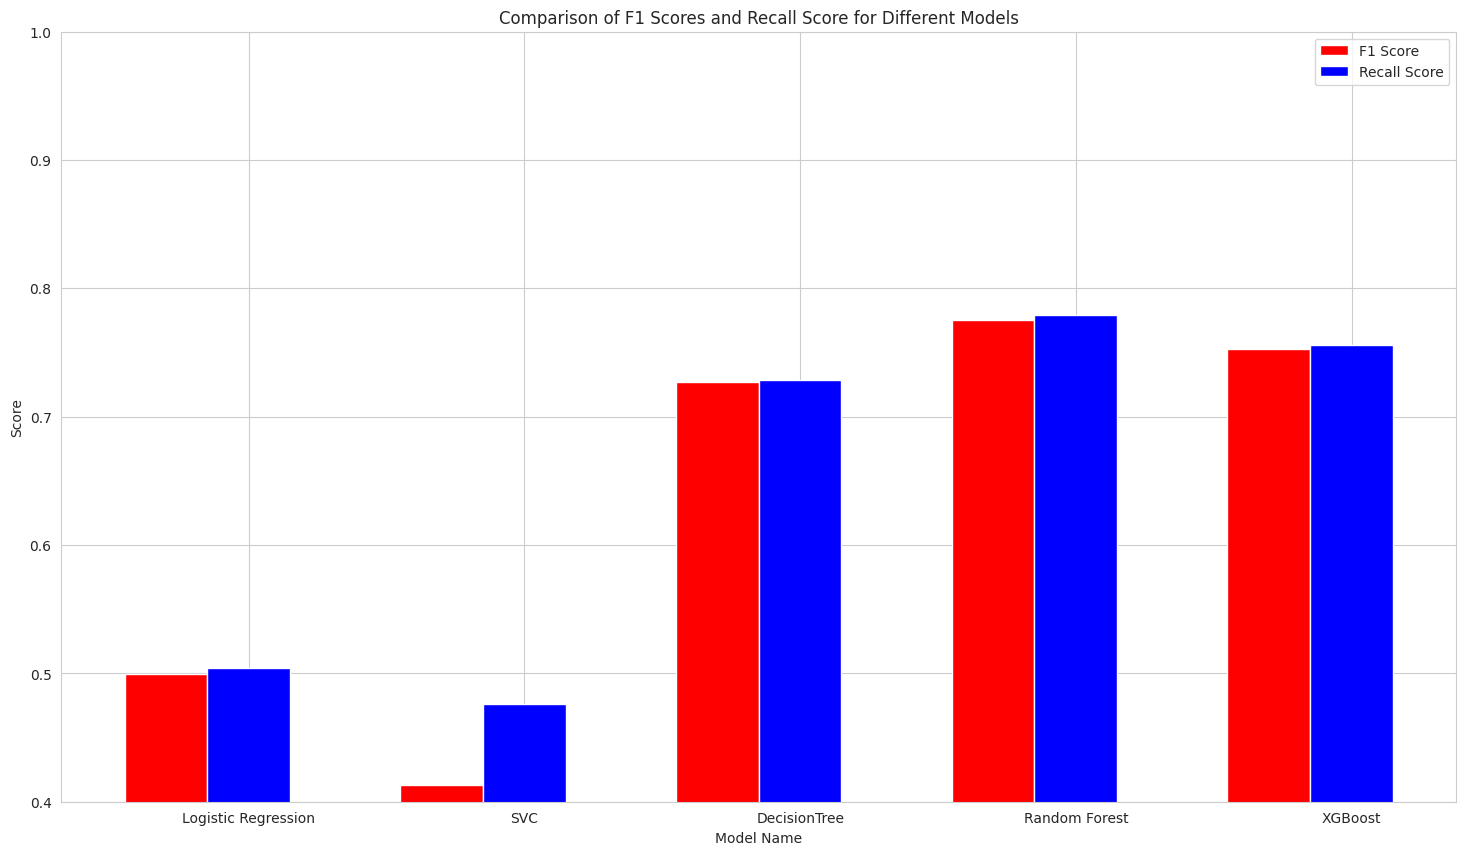

In [ ]:
#Model Comparisons for Columns Selected by Chi Square
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTable))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTable, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTable, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTable))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**1. Chi Square Model Performance**

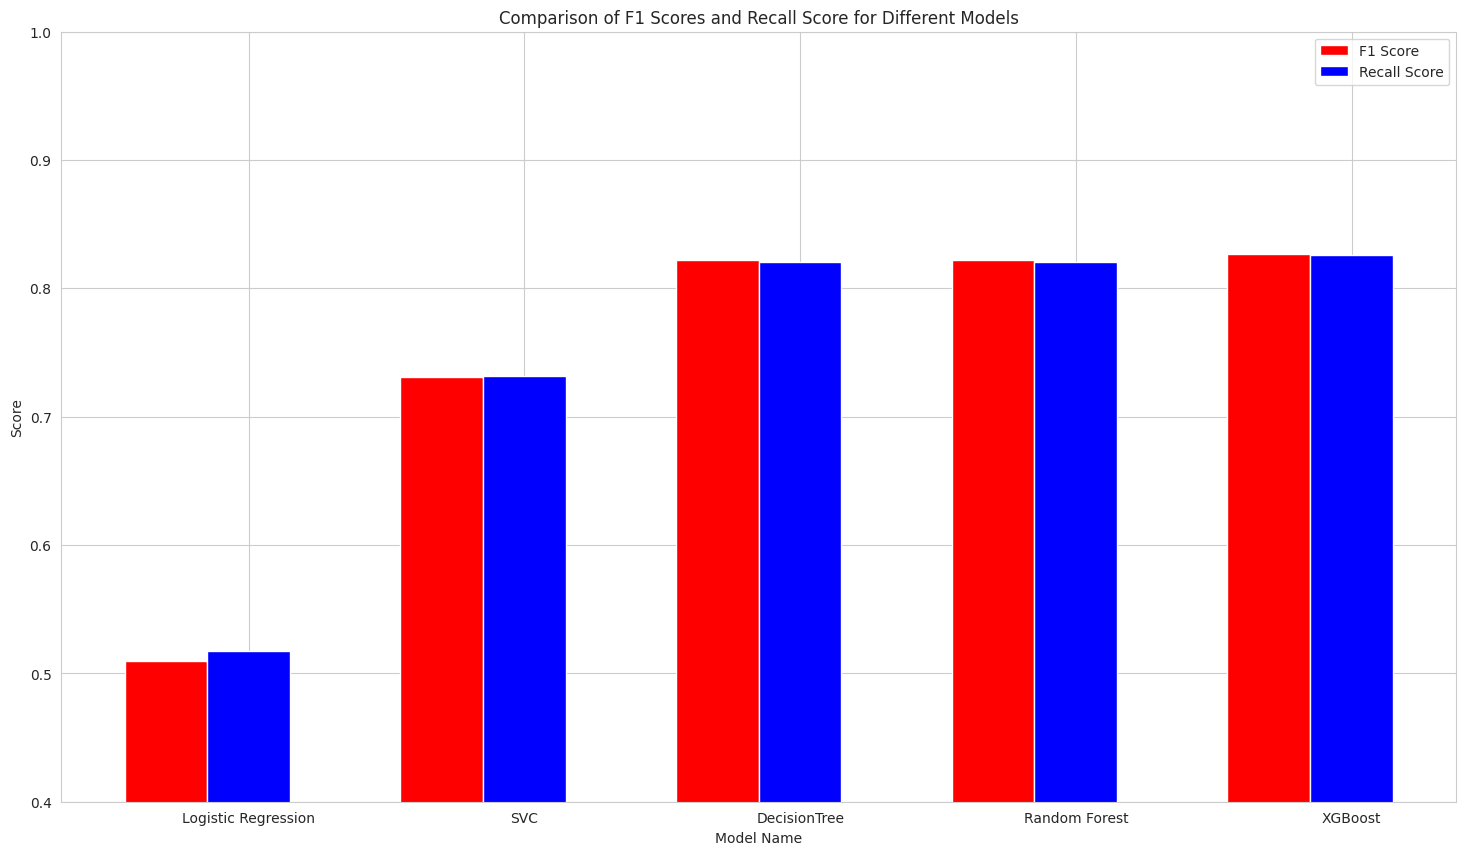

In [ ]:
#Model Comparisons for Columns Selected by Chi Square
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableChi))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableChi, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableChi, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableChi))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**2. Forward Feature Selection Model Performance**


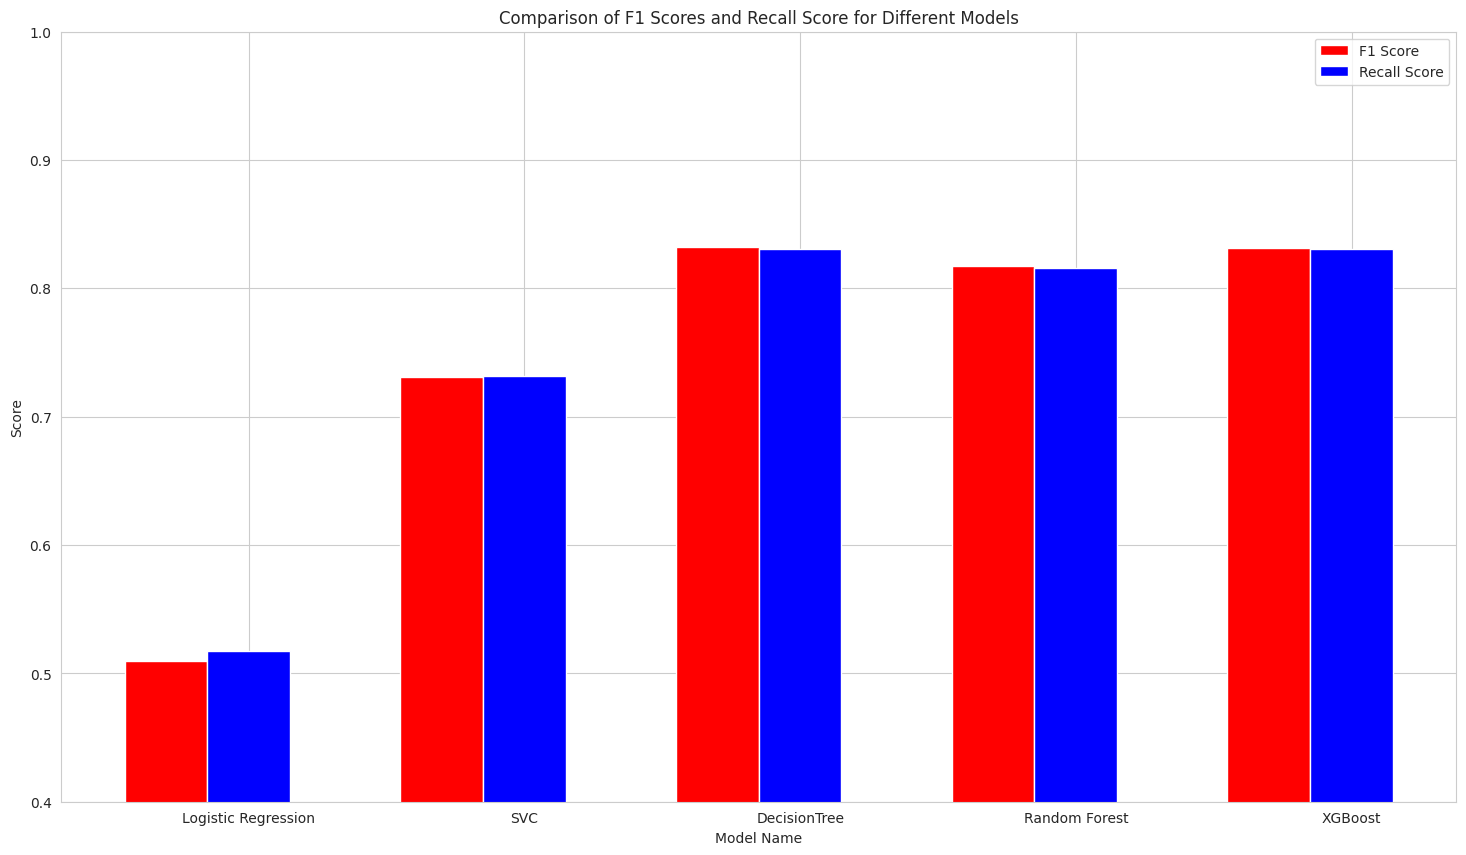

In [ ]:
#Model Comparisons for Columns Selected by Forward Feature Selection
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableFfs))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableFfs, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableFfs, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableFfs))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**3. Backward Feature Elimination Model Performance**


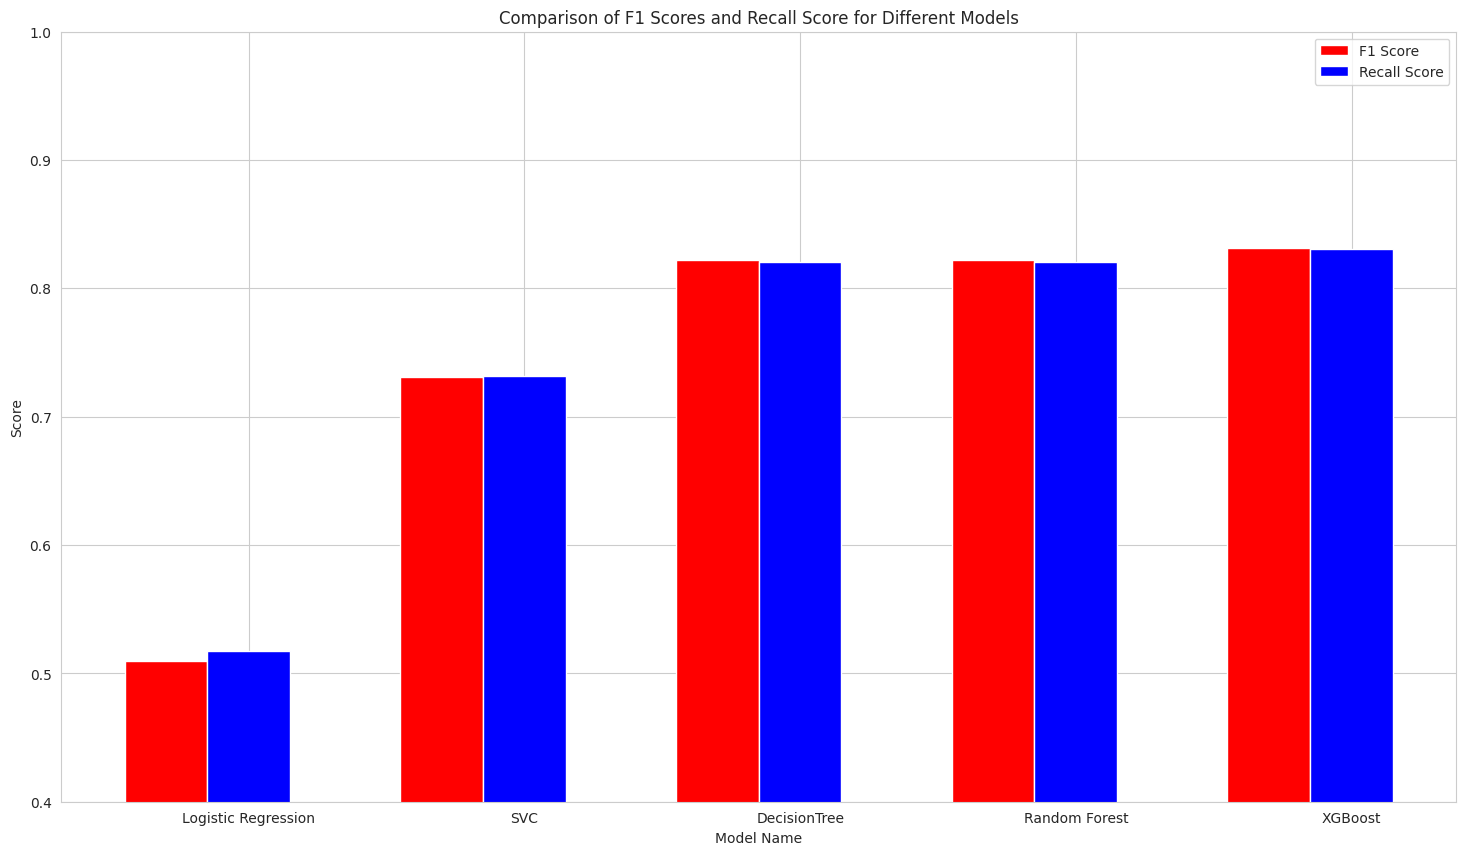

In [ ]:
#Model Comparisons for Columns Selected by Backward Feature Elimination
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableBfe))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableBfe, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableBfe, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableBfe))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**4. Recursive Feature Elimination Model Performance**

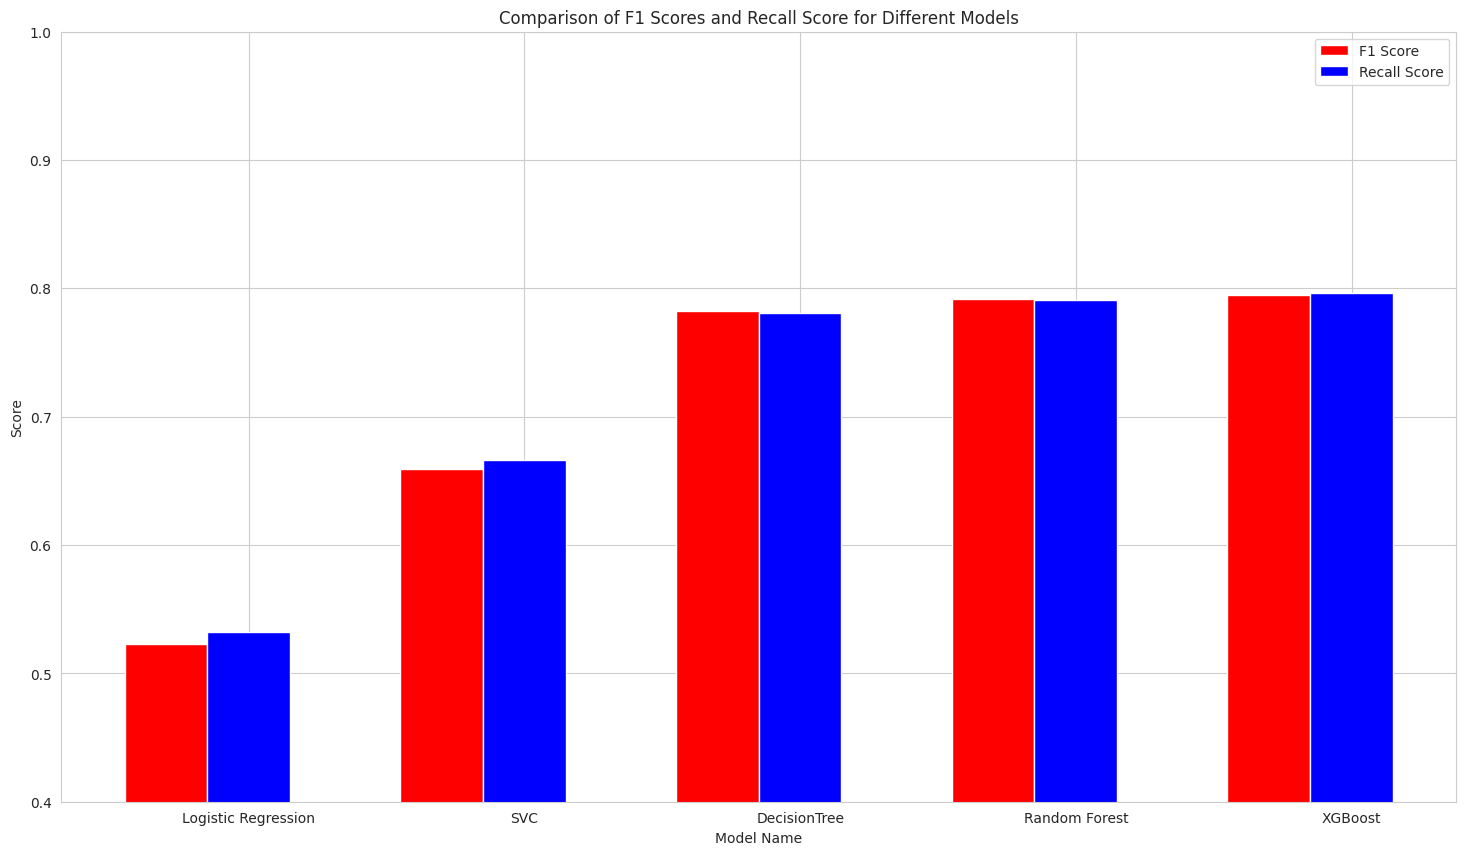

In [ ]:
#Model Comparisons for Columns Selected by Recursive Feature Elimination
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableRFE))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableRFE, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableRFE, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableRFE))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**5. Random Forest Importance Model Performance**

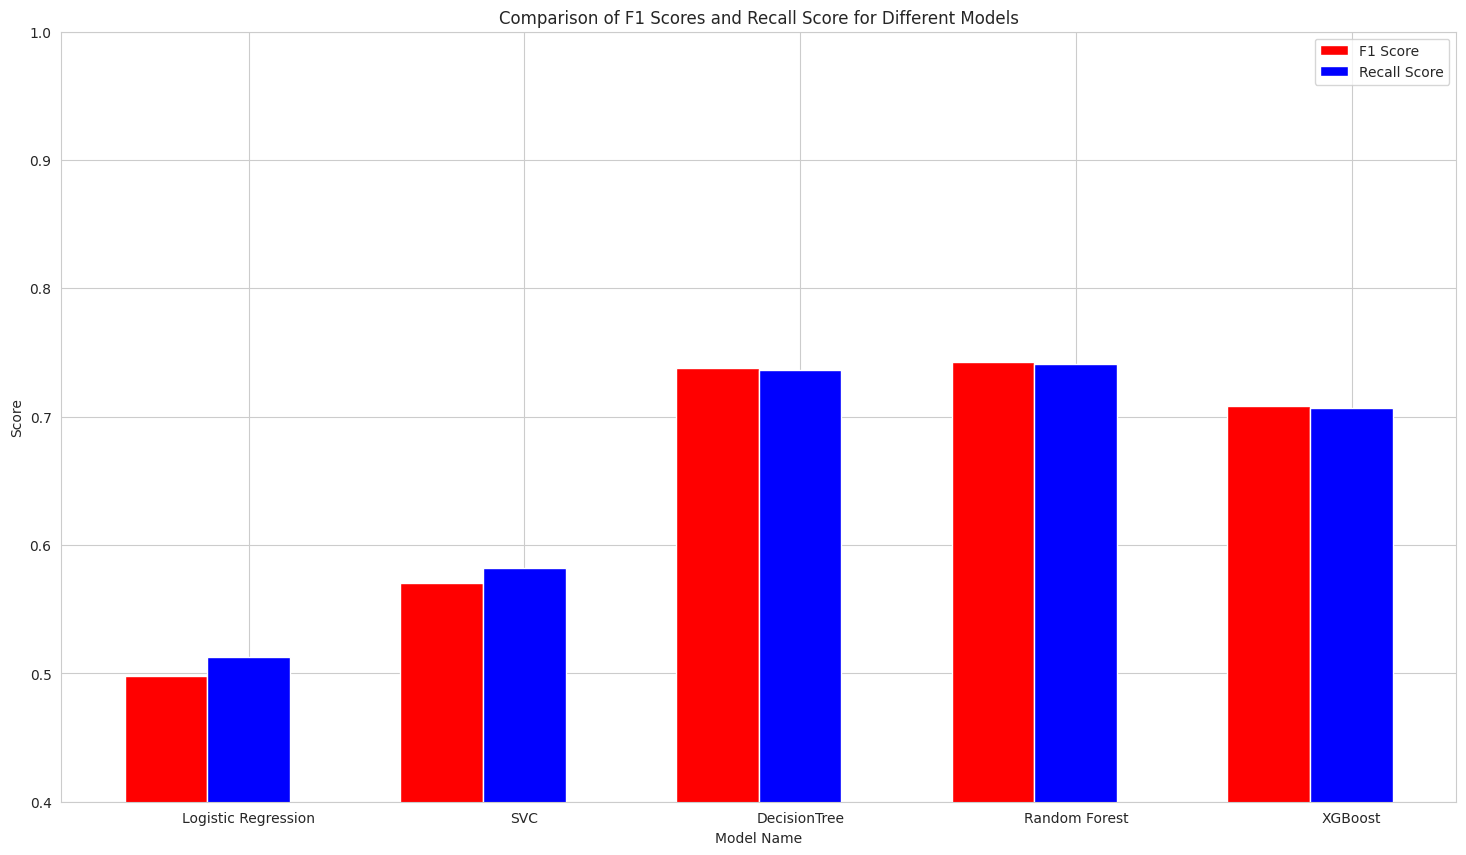

In [ ]:
#Model Comparisons for Columns Selected by Random Forest Importance
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableRfi))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableRfi, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableRfi, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableRfi))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**6. L1 Regularization (LASSO)**

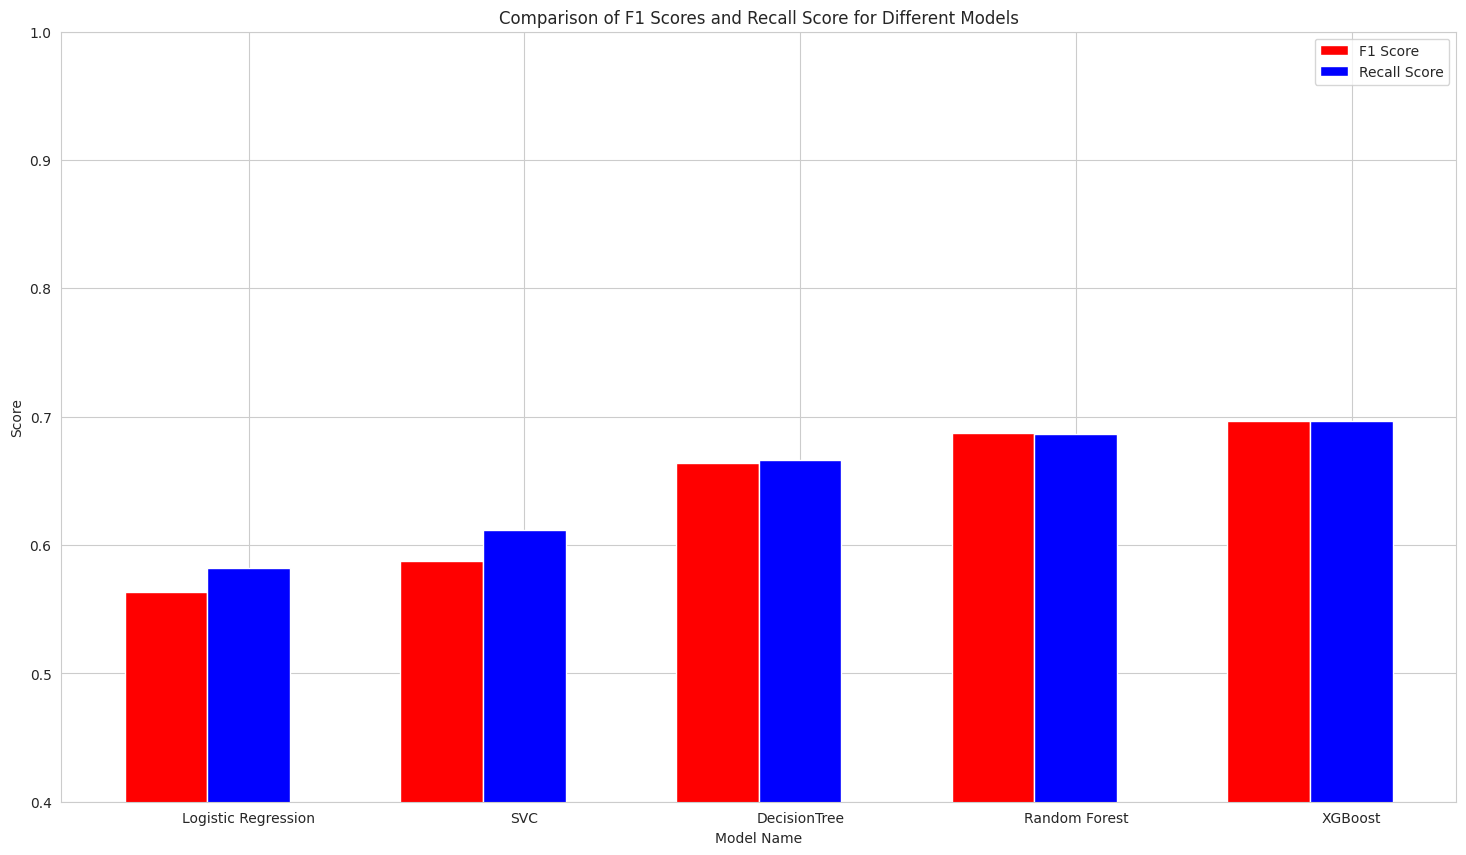

In [ ]:
#Model Comparisons for Columns Selected by Random Forest Importance
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableLASSO))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableLASSO, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableLASSO, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableLASSO))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**7. L2 Regularization (Ridge)**

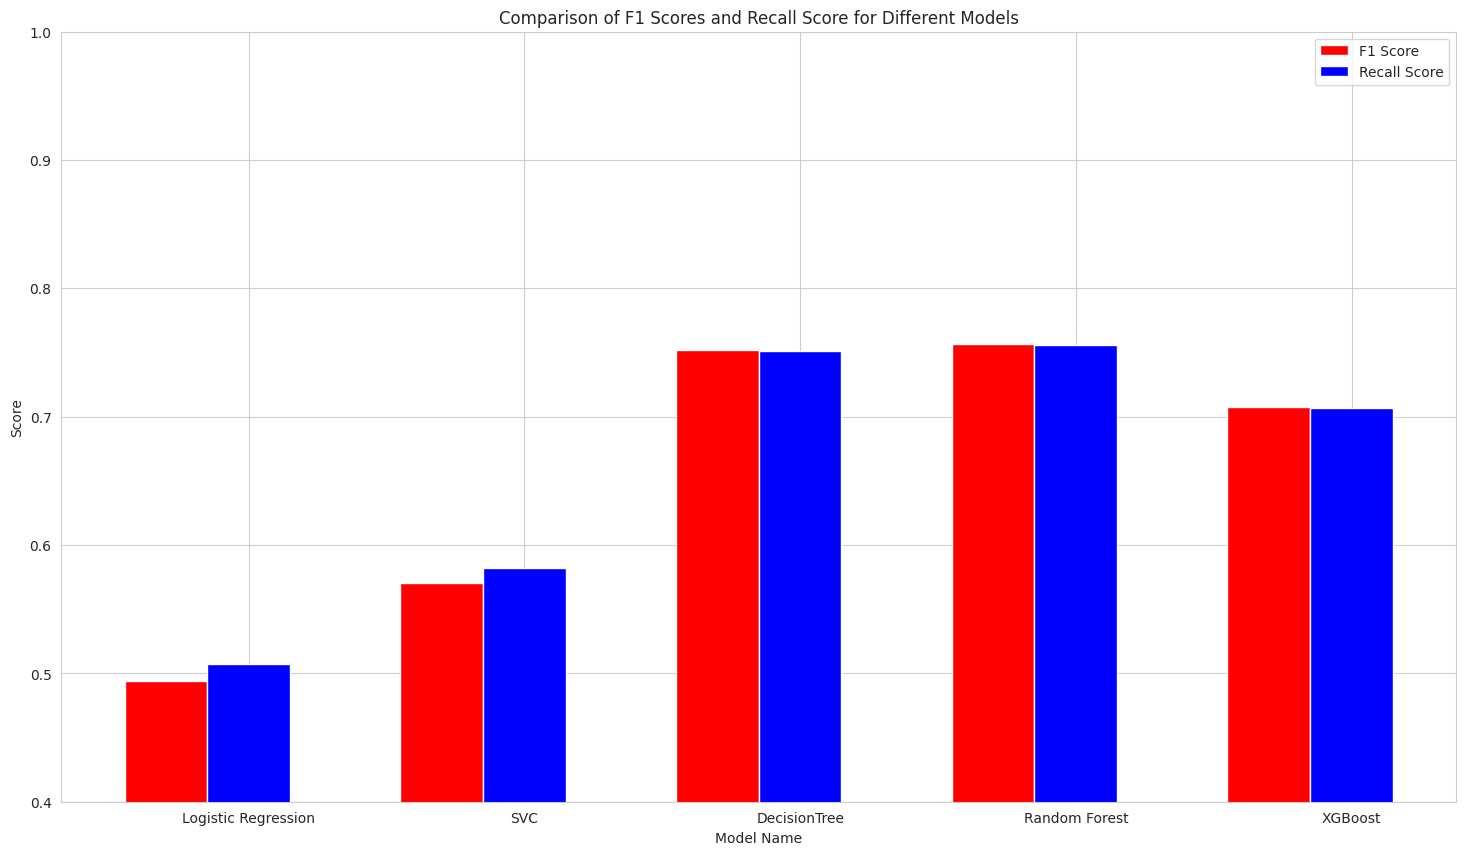

In [ ]:
#Model Comparisons for Columns Selected by Random Forest Importance
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableRidge))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableRidge, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableRidge, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableRidge))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

**Plotting the accuracies for the feature techniques used**

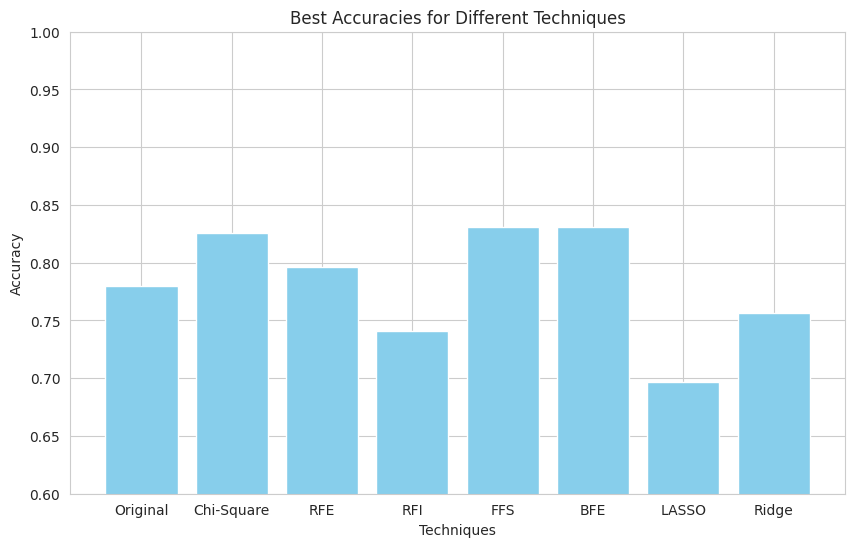

In [ ]:
# Plotting
techniques = ['Original','Chi-Square', 'RFE', 'RFI', 'FFS', 'BFE', 'LASSO','Ridge']
plt.figure(figsize=(10, 6))
plt.bar(techniques, best_accuracies, color='skyblue')
plt.title('Best Accuracies for Different Techniques')
plt.xlabel('Techniques')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

### **Hyperparameter Tuning**

In the hyperparameter tuning , we fine-tune the internal settings of our machine learning models to enhance their performance. By systematically adjusting parameters such as learning rates and regularization factors, we optimize the models' ability to accurately predict maternal health risks. This process ensures our models are finely tuned and well-suited for real-world applications.

In [ ]:
# Processed Dataset
x_ffs = maternal_health_df_cleaned[FFS_features]
y_ffs = maternal_health_df_cleaned.RiskLevel
x_train_ffs, x_test_ffs, y_train_ffs, y_test_ffs = train_test_split(x_ffs, y_ffs, test_size=0.2, random_state=1)

In [ ]:

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(x_train_ffs, y_train_ffs)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ffs)

print("Train accuracy:", best_model.score(x_train_ffs, y_train_ffs))
print("Test accuracy:", best_model.score(x_test_ffs, y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)


print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, y_pred))


Fitting 5 folds for each of 896 candidates, totalling 4480 fits
Best Parameters:  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.8099999999999999
Train accuracy: 0.92875
Test accuracy: 0.8159203980099502
F1 Score:  0.8167952345754838
Precision Score:  0.8181940973863713
Recall Score:  0.8159203980099502
accuracy:  0.8159203980099502
[2 1 2 1 0 2 2 0 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 0 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [12 54  4]
 [ 3  4 47]]
Accuracy: 81.59203980099502 %
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        77
           1       0.7

In [ ]:
rf_class_report = classification_report(y_test_ffs, y_pred, output_dict=True)
rf_acc = accuracy_score(y_test_ffs, y_pred)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(x_train_ffs, y_train_ffs)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ffs)

print("Train accuracy:", best_model.score(x_train_ffs, y_train_ffs))
print("Test accuracy:", best_model.score(x_test_ffs, y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("Accuracy: ", accuracy)


print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'Confusion Matrix:', cm)
print(f'Accuracy:', accuracy_score(y_test_ffs, y_pred) * 100, '%')
print(classification_report(y_test_ffs, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [ ]:
xgb_class_report = classification_report(y_test_ffs, y_pred, output_dict=True)
xgb_acc = accuracy_score(y_test_ffs, y_pred)

The classification report for the best model and hypertuned models are given below

In [ ]:
# Extracting metrics
metrics_1 = {
    'recall': best_class_report['weighted avg']['recall'],
    'f1-score': best_class_report['weighted avg']['f1-score'],
    'accuracy': best_acc
}

metrics_2 = {
    'recall': rf_class_report['weighted avg']['recall'],
    'f1-score': rf_class_report['weighted avg']['f1-score'],
    'accuracy': rf_acc
}

metrics_3 = {
    'recall': xgb_class_report['weighted avg']['recall'],
    'f1-score': xgb_class_report['weighted avg']['f1-score'],
    'accuracy': xgb_acc
}

print("Metrics for Inital model", metrics_1)
print("Metrics for Hypertuned Decision Tree:", metrics_2)
print("Metrics for Hypertuned XGB", metrics_3)

In our efforts to hyper-tune XGBoost and decision tree, we observed an interesting outcome where the simpler initial models outperformed the hyper-tuned versions in accuracy.

This highlights a key principle in machine learning: more complex models, resulting from hyper-tuning, don't always lead to better performance. Such models can overfit to training data, compromising their ability to generalize to new data. This experience underscores the importance of balancing model complexity with generalization capabilities. It demonstrates that in some cases, especially with specific dataset characteristics or imbalances, simpler models can be more effective.

# **VI. Conclusion and Final Recommendations**

<!-- Please describe how your methods showed better results than others considering your relevant methods. -->

In conclusion, our extensive exploration of feature selection methods and machine learning model evaluation for maternal health risk prediction yielded valuable insights into the optimal approaches for this critical healthcare challenge.

For our *feature selection* process, we employed various methods, including Correlation, Chi-square, Recursive Feature Elimination, Random Forest Importance, Forward Feature Selection, Backward Feature Elimination, Regularization L1 (LASSO), and Regularization L2 (Ridge). Subsequently, we assessed machine learning models—Logistic Regression, SVC, Decision Tree, Random Forest, and XGBoost—using the top 5 features derived from these selection methods. *Notably, Forward Feature Selection (FFS), Backward Feature Elimination (BFE), and Chi-square consistently emerged as the top-performing methods, exhibiting the highest accuracy scores*.

These three feature selection techniques *consistently identified Age, Diastolic BP, Systolic BP, Blood Sugar, and Heart Rate as the top 5 features influencing maternal health risk across the evaluated machine learning models*. FFS, known for progressively adding impactful features, and BFE, which iteratively eliminates less influential features, showcased their effectiveness in creating concise yet accurate predictive models. Chi-square, designed to assess relationships between categorical variables, excelled in capturing non-linear dependencies, making it particularly adept at identifying crucial factors affecting maternal health risk.

In summary, our comprehensive approach to feature selection and model evaluation underscores the significance of tailored techniques for healthcare data. FFS, BFE, and Chi-square not only consistently outperformed other methods but also provided actionable insights, emphasizing the pivotal role of Age, Diastolic BP, Systolic BP, Blood Sugar, and Heart Rate in maternal health risk prediction.

Age, Diastolic BP, Systolic BP, Blood Sugar, and Heart Rate are critical factors in predicting maternal health risk. Age can influence risk levels for various pregnancy-related complications, while blood pressure readings (both systolic and diastolic) are essential indicators of preeclampsia, a serious condition affecting pregnant women. Blood sugar levels help in identifying gestational diabetes, and heart rate monitoring is crucial for assessing both the mother's and fetus's well-being, indicating potential cardiovascular stress or anomalies. Together, these parameters offer a comprehensive insight into the health status of an expectant mother, aiding in early risk identification and management.

This analysis contributes valuable knowledge for optimizing the design and implementation of maternal care monitoring systems, particularly within the context of Internet of Medical Things (IoMT) devices.